# Water Budget Results: Plot Delta Precipitation

Plot precipitation items from the water budget results

## Parameters and Imports

In [1]:
%matplotlib inline

In [2]:
from IPython.display import display, HTML
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import pickle
import seaborn as sns
from scipy.signal import butter, lfilter, freqz, sosfilt
from copy import deepcopy

In [3]:
plt.rcParams['svg.fonttype'] = 'none'

In [4]:
#IN_DIR = r'C:\Users\nmartin\Documents\CC_IRD\Process_Results'
IN_DIR = r'C:\Users\nmart\OneDrive\CC_IRD\Process_Results'
SIM_ROOT = "DCmH_Del_"
XLSX_ROOT = "%s_ProcessMonthly_Stats.xlsx"

In [5]:
OUT_DIR = r'C:\Users\nmart\Documents\CC_Plots'

In [6]:
TOT_AREA_AC = 113910.6107  # total area in acres
CONV_Multiply = (1.0 / TOT_AREA_AC ) * ( 12.0 / 1.0 ) * ( 25.4 / 1.0 ) # conversion factor af to mm

In [7]:
SM_NUM = 16

In [8]:
# lambda function for units conversion
CONV_AF_to_MM = lambda AF: AF * CONV_Multiply

In [9]:
# Butterworth filter
# functions from 
# https://stackoverflow.com/questions/25191620/creating-lowpass-filter-in-scipy-understanding-methods-and-units
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    #b, a = butter(order, normal_cutoff, btype='lowpass', analog=False, output='ba' )
    sos = butter(order, normal_cutoff, btype='lowpass', analog=False, output='sos' )
    return sos

def butter_lowpass_filter(data, cutoff, fs, order=5):
    #b, a = butter_lowpass(cutoff, fs, order=order)
    sos = butter_lowpass(cutoff, fs, order=order)
    #y = lfilter(b, a, data)
    y = sosfilt(sos, data)
    return y

In [10]:
# definitions for Butterworth filtering
FS = 12      # samples per year
NYQ = 0.5 * FS
CUTOFF = (1.0/4.0)   # cutoff rate in years
FS, NYQ, CUTOFF

(12, 6.0, 0.25)

In [11]:
# time periods
TP_DICT = { 1 : [ dt.datetime(1981, 1, 1), dt.datetime(2010, 12, 31)],
            2 : [ dt.datetime(2011, 1, 1), dt.datetime(2040, 12, 31)],
            3 : [ dt.datetime(2041, 1, 1), dt.datetime(2070, 12, 31)],
            4 : [ dt.datetime(2071, 1, 1), dt.datetime(2100, 12, 31)],}

In [12]:
OurQs = np.array( [ round( 0.01 * x, 2 ) for x in range(101) ], dtype=np.float32 )
NumQs = len( OurQs )
NumQs

101

In [13]:
StatsHdsList = list()
for iI in range(NumQs):
    cQ = OurQs[iI]
    Hdr = "%d_ptile" % round(cQ * 100.0)
    StatsHdsList.append( Hdr )
# end of for
StatsHdsList.append( "Average" )
StatsHdsList.append( "Variance" )
StatsHdsList.append( "Skew" )
StatsHdsList.append( "Kurt" )

In [14]:
NumHdrs = len( StatsHdsList )
NumHdrs

105

In [15]:
RdHds = deepcopy( StatsHdsList )
RdHds.insert( 0, "Date" )

## Load from Spreadsheets

### Precip

In [16]:
InFile1 = os.path.normpath( os.path.join( IN_DIR, XLSX_ROOT % SIM_ROOT ) )
S1PreStats1 = pd.read_excel( InFile1, sheet_name="Precip_1", header=0, names=RdHds, index_col=0,
                             parse_dates=True )

In [17]:
display( HTML( S1PreStats1.tail().to_html() ) )

,0_ptile,1_ptile,2_ptile,3_ptile,4_ptile,5_ptile,6_ptile,7_ptile,8_ptile,9_ptile,10_ptile,11_ptile,12_ptile,13_ptile,14_ptile,15_ptile,16_ptile,17_ptile,18_ptile,19_ptile,20_ptile,21_ptile,22_ptile,23_ptile,24_ptile,25_ptile,26_ptile,27_ptile,28_ptile,29_ptile,30_ptile,31_ptile,32_ptile,33_ptile,34_ptile,35_ptile,36_ptile,37_ptile,38_ptile,39_ptile,40_ptile,41_ptile,42_ptile,43_ptile,44_ptile,45_ptile,46_ptile,47_ptile,48_ptile,49_ptile,50_ptile,51_ptile,52_ptile,53_ptile,54_ptile,55_ptile,56_ptile,57_ptile,58_ptile,59_ptile,60_ptile,61_ptile,62_ptile,63_ptile,64_ptile,65_ptile,66_ptile,67_ptile,68_ptile,69_ptile,70_ptile,71_ptile,72_ptile,73_ptile,74_ptile,75_ptile,76_ptile,77_ptile,78_ptile,79_ptile,80_ptile,81_ptile,82_ptile,83_ptile,84_ptile,85_ptile,86_ptile,87_ptile,88_ptile,89_ptile,90_ptile,91_ptile,92_ptile,93_ptile,94_ptile,95_ptile,96_ptile,97_ptile,98_ptile,99_ptile,100_ptile,Average,Variance,Skew,Kurt
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-08-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2010-09-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2010-10-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2010-11-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2010-12-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
S1PreStats1 = S1PreStats1 * CONV_Multiply

In [19]:
display( HTML( S1PreStats1.tail().to_html() ) )

,0_ptile,1_ptile,2_ptile,3_ptile,4_ptile,5_ptile,6_ptile,7_ptile,8_ptile,9_ptile,10_ptile,11_ptile,12_ptile,13_ptile,14_ptile,15_ptile,16_ptile,17_ptile,18_ptile,19_ptile,20_ptile,21_ptile,22_ptile,23_ptile,24_ptile,25_ptile,26_ptile,27_ptile,28_ptile,29_ptile,30_ptile,31_ptile,32_ptile,33_ptile,34_ptile,35_ptile,36_ptile,37_ptile,38_ptile,39_ptile,40_ptile,41_ptile,42_ptile,43_ptile,44_ptile,45_ptile,46_ptile,47_ptile,48_ptile,49_ptile,50_ptile,51_ptile,52_ptile,53_ptile,54_ptile,55_ptile,56_ptile,57_ptile,58_ptile,59_ptile,60_ptile,61_ptile,62_ptile,63_ptile,64_ptile,65_ptile,66_ptile,67_ptile,68_ptile,69_ptile,70_ptile,71_ptile,72_ptile,73_ptile,74_ptile,75_ptile,76_ptile,77_ptile,78_ptile,79_ptile,80_ptile,81_ptile,82_ptile,83_ptile,84_ptile,85_ptile,86_ptile,87_ptile,88_ptile,89_ptile,90_ptile,91_ptile,92_ptile,93_ptile,94_ptile,95_ptile,96_ptile,97_ptile,98_ptile,99_ptile,100_ptile,Average,Variance,Skew,Kurt
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-08-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-09-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-10-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-11-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-12-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
S1MaxPrecip1 = S1PreStats1[StatsHdsList[100]].max()
S1MinPrecip1 = S1PreStats1[StatsHdsList[0]].min()
S1MaxPrecip1, S1MinPrecip1

(0.0, 0.0)

In [21]:
S1PreStats2 = pd.read_excel( InFile1, sheet_name="Precip_2", header=0, names=RdHds, index_col=0,
                             parse_dates=True )
S1PreStats2 = S1PreStats2 * CONV_Multiply

In [22]:
S1MaxPrecip2 = S1PreStats2[StatsHdsList[100]].max()
S1MinPrecip2 = S1PreStats2[StatsHdsList[0]].min()
S1MaxPrecip2, S1MinPrecip2

(183.9315002584811, -49.9118275369859)

In [23]:
S1PreStats3 = pd.read_excel( InFile1, sheet_name="Precip_3", header=0, names=RdHds, index_col=0,
                             parse_dates=True )
S1PreStats3 = S1PreStats3 * CONV_Multiply

In [24]:
S1MaxPrecip3 = S1PreStats3[StatsHdsList[100]].max()
S1MinPrecip3 = S1PreStats3[StatsHdsList[0]].min()
S1MaxPrecip3, S1MinPrecip3

(166.62371933904748, -47.10053899482762)

In [25]:
S1PreStats4 = pd.read_excel( InFile1, sheet_name="Precip_4", header=0, names=RdHds, index_col=0,
                             parse_dates=True )
S1PreStats4 = S1PreStats4 * CONV_Multiply

In [26]:
S1MaxPrecip4 = S1PreStats4[StatsHdsList[100]].max()
S1MinPrecip4 = S1PreStats4[StatsHdsList[0]].min()
S1MaxPrecip4, S1MinPrecip4

(191.0572794908996, -46.03295593432313)

In [27]:
S1MaxPrecip = max( S1MaxPrecip1, S1MaxPrecip2, S1MaxPrecip3, S1MaxPrecip4 )
S1MinPrecip = min( S1MinPrecip1, S1MinPrecip2, S1MinPrecip3, S1MinPrecip4 )
S1MaxPrecip, S1MinPrecip

(191.0572794908996, -49.9118275369859)

### PET

In [28]:
InFile1 = os.path.normpath( os.path.join( IN_DIR, XLSX_ROOT % SIM_ROOT ) )
S1PETStats1 = pd.read_excel( InFile1, sheet_name="PET_1", header=0, names=RdHds, index_col=0,
                             parse_dates=True )
S1PETStats1 = S1PETStats1 * CONV_Multiply

In [29]:
display( HTML( S1PETStats1.head().to_html() ) )

,0_ptile,1_ptile,2_ptile,3_ptile,4_ptile,5_ptile,6_ptile,7_ptile,8_ptile,9_ptile,10_ptile,11_ptile,12_ptile,13_ptile,14_ptile,15_ptile,16_ptile,17_ptile,18_ptile,19_ptile,20_ptile,21_ptile,22_ptile,23_ptile,24_ptile,25_ptile,26_ptile,27_ptile,28_ptile,29_ptile,30_ptile,31_ptile,32_ptile,33_ptile,34_ptile,35_ptile,36_ptile,37_ptile,38_ptile,39_ptile,40_ptile,41_ptile,42_ptile,43_ptile,44_ptile,45_ptile,46_ptile,47_ptile,48_ptile,49_ptile,50_ptile,51_ptile,52_ptile,53_ptile,54_ptile,55_ptile,56_ptile,57_ptile,58_ptile,59_ptile,60_ptile,61_ptile,62_ptile,63_ptile,64_ptile,65_ptile,66_ptile,67_ptile,68_ptile,69_ptile,70_ptile,71_ptile,72_ptile,73_ptile,74_ptile,75_ptile,76_ptile,77_ptile,78_ptile,79_ptile,80_ptile,81_ptile,82_ptile,83_ptile,84_ptile,85_ptile,86_ptile,87_ptile,88_ptile,89_ptile,90_ptile,91_ptile,92_ptile,93_ptile,94_ptile,95_ptile,96_ptile,97_ptile,98_ptile,99_ptile,100_ptile,Average,Variance,Skew,Kurt
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1981-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1981-02-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1981-03-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1981-04-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1981-05-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
S1MaxPET1 = S1PETStats1[StatsHdsList[100]].max()
S1MinPET1 = S1PETStats1[StatsHdsList[0]].min()
S1MaxPET1, S1MinPET1

(0.0, 0.0)

In [31]:
S1PETStats2 = pd.read_excel( InFile1, sheet_name="PET_2", header=0, names=RdHds, index_col=0,
                             parse_dates=True )
S1PETStats2 = S1PETStats2 * CONV_Multiply

In [32]:
S1MaxPET2 = S1PETStats2[StatsHdsList[100]].max()
S1MinPET2 = S1PETStats2[StatsHdsList[0]].min()
S1MaxPET2, S1MinPET2

(15.085898708347976, 0.6625194550257476)

In [33]:
S1PETStats3 = pd.read_excel( InFile1, sheet_name="PET_3", header=0, names=RdHds, index_col=0,
                             parse_dates=True )
S1PETStats3 = S1PETStats3 * CONV_Multiply

In [34]:
S1MaxPET3 = S1PETStats3[StatsHdsList[100]].max()
S1MinPET3 = S1PETStats3[StatsHdsList[0]].min()
S1MaxPET3, S1MinPET3

(20.86581864930267, 2.095082678669246)

In [35]:
S1PETStats4 = pd.read_excel( InFile1, sheet_name="PET_4", header=0, names=RdHds, index_col=0,
                             parse_dates=True )
S1PETStats4 = S1PETStats4 * CONV_Multiply

In [36]:
S1MaxPET4 = S1PETStats4[StatsHdsList[100]].max()
S1MinPET4 = S1PETStats4[StatsHdsList[0]].min()
S1MaxPET4, S1MinPET4

(29.396374820823613, 3.4565608422748633)

In [37]:
S1MaxPET = max( S1MaxPET1, S1MaxPET2, S1MaxPET3, S1MaxPET4 )
S1MinPET = min( S1MinPET1, S1MinPET2, S1MinPET3, S1MinPET4 )
S1MaxPET, S1MinPET

(29.396374820823613, 0.0)

### AET

In [38]:
InFile1 = os.path.normpath( os.path.join( IN_DIR, XLSX_ROOT % SIM_ROOT ) )
S1AETStats1 = pd.read_excel( InFile1, sheet_name="AET_1", header=0, names=RdHds, index_col=0,
                             parse_dates=True )
S1AETStats1 = S1AETStats1 * CONV_Multiply

In [39]:
display( HTML( S1AETStats1.head().to_html() ) )

,0_ptile,1_ptile,2_ptile,3_ptile,4_ptile,5_ptile,6_ptile,7_ptile,8_ptile,9_ptile,10_ptile,11_ptile,12_ptile,13_ptile,14_ptile,15_ptile,16_ptile,17_ptile,18_ptile,19_ptile,20_ptile,21_ptile,22_ptile,23_ptile,24_ptile,25_ptile,26_ptile,27_ptile,28_ptile,29_ptile,30_ptile,31_ptile,32_ptile,33_ptile,34_ptile,35_ptile,36_ptile,37_ptile,38_ptile,39_ptile,40_ptile,41_ptile,42_ptile,43_ptile,44_ptile,45_ptile,46_ptile,47_ptile,48_ptile,49_ptile,50_ptile,51_ptile,52_ptile,53_ptile,54_ptile,55_ptile,56_ptile,57_ptile,58_ptile,59_ptile,60_ptile,61_ptile,62_ptile,63_ptile,64_ptile,65_ptile,66_ptile,67_ptile,68_ptile,69_ptile,70_ptile,71_ptile,72_ptile,73_ptile,74_ptile,75_ptile,76_ptile,77_ptile,78_ptile,79_ptile,80_ptile,81_ptile,82_ptile,83_ptile,84_ptile,85_ptile,86_ptile,87_ptile,88_ptile,89_ptile,90_ptile,91_ptile,92_ptile,93_ptile,94_ptile,95_ptile,96_ptile,97_ptile,98_ptile,99_ptile,100_ptile,Average,Variance,Skew,Kurt
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1981-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1981-02-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1981-03-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1981-04-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1981-05-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
S1MaxAET1 = S1AETStats1[StatsHdsList[100]].max()
S1MinAET1 = S1AETStats1[StatsHdsList[0]].min()
S1MaxAET1, S1MinAET1

(0.0, 0.0)

In [41]:
S1AETStats2 = pd.read_excel( InFile1, sheet_name="AET_2", header=0, names=RdHds, index_col=0,
                             parse_dates=True )
S1AETStats2 = S1AETStats2 * CONV_Multiply

In [42]:
S1MaxAET2 = S1AETStats2[StatsHdsList[100]].max()
S1MinAET2 = S1AETStats2[StatsHdsList[0]].min()
S1MaxAET2, S1MinAET2

(27.46294120430237, -28.43687088342419)

In [43]:
S1AETStats3 = pd.read_excel( InFile1, sheet_name="AET_3", header=0, names=RdHds, index_col=0,
                             parse_dates=True )
S1AETStats3 = S1AETStats3 * CONV_Multiply

In [44]:
S1MaxAET3 = S1AETStats3[StatsHdsList[100]].max()
S1MinAET3 = S1AETStats3[StatsHdsList[0]].min()
S1MaxAET3, S1MinAET3

(27.052511970736873, -28.71801031855177)

In [45]:
S1AETStats4 = pd.read_excel( InFile1, sheet_name="AET_4", header=0, names=RdHds, index_col=0,
                             parse_dates=True )
S1AETStats4 = S1AETStats4 * CONV_Multiply

In [46]:
S1MaxAET4 = S1AETStats4[StatsHdsList[100]].max()
S1MinAET4 = S1AETStats4[StatsHdsList[0]].min()
S1MaxAET4, S1MinAET4

(30.899353549419555, -27.03328170659439)

In [47]:
S1MaxAET = max( S1MaxAET1, S1MaxAET2, S1MaxAET3, S1MaxAET4 )
S1MinAET = min( S1MinAET1, S1MinAET2, S1MinAET3, S1MinAET4 )
S1MaxAET, S1MinAET

(30.899353549419555, -28.71801031855177)

### Runoff (RO)

In [48]:
InFile1 = os.path.normpath( os.path.join( IN_DIR, XLSX_ROOT % SIM_ROOT ) )
S1ROStats1 = pd.read_excel( InFile1, sheet_name="RO_1", header=0, names=RdHds, index_col=0,
                             parse_dates=True )
S1ROStats1 = S1ROStats1 * CONV_Multiply

In [49]:
display( HTML( S1ROStats1.head().to_html() ) )

,0_ptile,1_ptile,2_ptile,3_ptile,4_ptile,5_ptile,6_ptile,7_ptile,8_ptile,9_ptile,10_ptile,11_ptile,12_ptile,13_ptile,14_ptile,15_ptile,16_ptile,17_ptile,18_ptile,19_ptile,20_ptile,21_ptile,22_ptile,23_ptile,24_ptile,25_ptile,26_ptile,27_ptile,28_ptile,29_ptile,30_ptile,31_ptile,32_ptile,33_ptile,34_ptile,35_ptile,36_ptile,37_ptile,38_ptile,39_ptile,40_ptile,41_ptile,42_ptile,43_ptile,44_ptile,45_ptile,46_ptile,47_ptile,48_ptile,49_ptile,50_ptile,51_ptile,52_ptile,53_ptile,54_ptile,55_ptile,56_ptile,57_ptile,58_ptile,59_ptile,60_ptile,61_ptile,62_ptile,63_ptile,64_ptile,65_ptile,66_ptile,67_ptile,68_ptile,69_ptile,70_ptile,71_ptile,72_ptile,73_ptile,74_ptile,75_ptile,76_ptile,77_ptile,78_ptile,79_ptile,80_ptile,81_ptile,82_ptile,83_ptile,84_ptile,85_ptile,86_ptile,87_ptile,88_ptile,89_ptile,90_ptile,91_ptile,92_ptile,93_ptile,94_ptile,95_ptile,96_ptile,97_ptile,98_ptile,99_ptile,100_ptile,Average,Variance,Skew,Kurt
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1981-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1981-02-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1981-03-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1981-04-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1981-05-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
S1MaxRO1 = S1ROStats1[StatsHdsList[100]].max()
S1MinRO1 = S1ROStats1[StatsHdsList[0]].min()
S1MaxRO1, S1MinRO1

(0.0, 0.0)

In [51]:
S1ROStats2 = pd.read_excel( InFile1, sheet_name="RO_2", header=0, names=RdHds, index_col=0,
                             parse_dates=True )
S1ROStats2 = S1ROStats2 * CONV_Multiply

In [52]:
S1MaxRO2 = S1ROStats2[StatsHdsList[100]].max()
S1MinRO2 = S1ROStats2[StatsHdsList[0]].min()
S1MaxRO2, S1MinRO2

(123.40080187949738, -102.3896491389604)

In [53]:
S1ROStats3 = pd.read_excel( InFile1, sheet_name="RO_3", header=0, names=RdHds, index_col=0,
                             parse_dates=True )
S1ROStats3 = S1ROStats3 * CONV_Multiply

In [54]:
S1MaxRO3 = S1ROStats3[StatsHdsList[100]].max()
S1MinRO3 = S1ROStats3[StatsHdsList[0]].min()
S1MaxRO3, S1MinRO3

(111.38892816825516, -84.5805938276418)

In [55]:
S1ROStats4 = pd.read_excel( InFile1, sheet_name="RO_4", header=0, names=RdHds, index_col=0,
                             parse_dates=True )
S1ROStats4 = S1ROStats4 * CONV_Multiply

In [56]:
S1MaxRO4 = S1ROStats4[StatsHdsList[100]].max()
S1MinRO4 = S1ROStats4[StatsHdsList[0]].min()
S1MaxRO4, S1MinRO4

(172.77208134835936, -85.66942020570822)

In [57]:
S1MaxRO = max( S1MaxRO1, S1MaxRO2, S1MaxRO3, S1MaxRO4 )
S1MinRO = min( S1MinRO1, S1MinRO2, S1MinRO3, S1MinRO4 )
S1MaxRO, S1MinRO

(172.77208134835936, -102.3896491389604)

### Recharge (Re)

In [58]:
InFile1 = os.path.normpath( os.path.join( IN_DIR, XLSX_ROOT % SIM_ROOT ) )
S1REStats1 = pd.read_excel( InFile1, sheet_name="RE_1", header=0, names=RdHds, index_col=0,
                             parse_dates=True )
S1REStats1 = S1REStats1 * CONV_Multiply

In [59]:
display( HTML( S1REStats1.head().to_html() ) )

,0_ptile,1_ptile,2_ptile,3_ptile,4_ptile,5_ptile,6_ptile,7_ptile,8_ptile,9_ptile,10_ptile,11_ptile,12_ptile,13_ptile,14_ptile,15_ptile,16_ptile,17_ptile,18_ptile,19_ptile,20_ptile,21_ptile,22_ptile,23_ptile,24_ptile,25_ptile,26_ptile,27_ptile,28_ptile,29_ptile,30_ptile,31_ptile,32_ptile,33_ptile,34_ptile,35_ptile,36_ptile,37_ptile,38_ptile,39_ptile,40_ptile,41_ptile,42_ptile,43_ptile,44_ptile,45_ptile,46_ptile,47_ptile,48_ptile,49_ptile,50_ptile,51_ptile,52_ptile,53_ptile,54_ptile,55_ptile,56_ptile,57_ptile,58_ptile,59_ptile,60_ptile,61_ptile,62_ptile,63_ptile,64_ptile,65_ptile,66_ptile,67_ptile,68_ptile,69_ptile,70_ptile,71_ptile,72_ptile,73_ptile,74_ptile,75_ptile,76_ptile,77_ptile,78_ptile,79_ptile,80_ptile,81_ptile,82_ptile,83_ptile,84_ptile,85_ptile,86_ptile,87_ptile,88_ptile,89_ptile,90_ptile,91_ptile,92_ptile,93_ptile,94_ptile,95_ptile,96_ptile,97_ptile,98_ptile,99_ptile,100_ptile,Average,Variance,Skew,Kurt
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1981-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1981-02-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1981-03-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1981-04-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1981-05-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
S1MaxRE1 = S1REStats1[StatsHdsList[100]].max()
S1MinRE1 = S1REStats1[StatsHdsList[0]].min()
S1MaxRE1, S1MinRE1

(0.0, 0.0)

In [61]:
S1REStats2 = pd.read_excel( InFile1, sheet_name="RE_2", header=0, names=RdHds, index_col=0,
                             parse_dates=True )
S1REStats2 = S1REStats2 * CONV_Multiply

In [62]:
S1MaxRE2 = S1REStats2[StatsHdsList[100]].max()
S1MinRE2 = S1REStats2[StatsHdsList[0]].min()
S1MaxRE2, S1MinRE2

(211.30549587119728, -52.90157871495329)

In [63]:
S1REStats3 = pd.read_excel( InFile1, sheet_name="RE_3", header=0, names=RdHds, index_col=0,
                             parse_dates=True )
S1REStats3 = S1REStats3 * CONV_Multiply

In [64]:
S1MaxRE3 = S1REStats3[StatsHdsList[100]].max()
S1MinRE3 = S1REStats3[StatsHdsList[0]].min()
S1MaxRE3, S1MinRE3

(224.82097444485575, -54.79829549987254)

In [65]:
S1REStats4 = pd.read_excel( InFile1, sheet_name="RE_4", header=0, names=RdHds, index_col=0,
                             parse_dates=True )
S1REStats4 = S1REStats4 * CONV_Multiply

In [66]:
S1MaxRE4 = S1REStats4[StatsHdsList[100]].max()
S1MinRE4 = S1REStats4[StatsHdsList[0]].min()
S1MaxRE4, S1MinRE4

(200.05058499602546, -63.380073133091095)

In [67]:
S1MaxRE = max( S1MaxRE1, S1MaxRE2, S1MaxRE3, S1MaxRE4 )
S1MinRE = min( S1MinRE1, S1MinRE2, S1MinRE3, S1MinRE4 )
S1MaxRE, S1MinRE

(224.82097444485575, -63.380073133091095)

### Water Availability

In [68]:
S1WatAvail1 = S1REStats1 + S1ROStats1
S1WatAvail2 = S1REStats2 + S1ROStats2
S1WatAvail3 = S1REStats3 + S1ROStats3
S1WatAvail4 = S1REStats4 + S1ROStats4
S1WatAv = pd.concat( [S1WatAvail1, S1WatAvail2, S1WatAvail3, S1WatAvail4 ])

In [69]:
S1MaxWA = S1WatAv[StatsHdsList[100]].max()
S1MinWA = S1WatAv[StatsHdsList[0]].min()
S1MaxWA, S1MinWA

(330.2716521900154, -139.37888932751434)

In [70]:
S1WatAvail4[StatsHdsList[50]].mean(), S1WatAvail4[StatsHdsList[50]].median()

(-0.021591347933054783, -0.061935425177003546)

In [71]:
S1WatAvail4[StatsHdsList[101]].mean()

1.580322423593733

## Plots

Individual plots

### Precip

In [72]:
S1MaxPrecip, S1MinPrecip

(191.0572794908996, -49.9118275369859)

In [73]:
MaxPrecip = 75.0
MinPrecip = -50.0

In [74]:
preTicks = [ -25.0, 0.0, 25.0, 50.0, 75.0 ]

In [75]:
StatsHdsList[95], StatsHdsList[5]

('95_ptile', '5_ptile')

In [76]:
S1PreStats1[StatsHdsList[101]].mean(), S1PreStats2[StatsHdsList[101]].mean(), S1PreStats3[StatsHdsList[101]].mean(), S1PreStats4[StatsHdsList[101]].mean()

(0.0, 0.5993033475940917, 1.7379527725440855, 2.3453500528971825)

In [77]:
S1PreStats1[StatsHdsList[101]].median(), S1PreStats2[StatsHdsList[101]].median(), S1PreStats3[StatsHdsList[101]].median(), S1PreStats4[StatsHdsList[101]].median()

(0.0, -0.14786788006967622, 0.7721822643380027, 1.1512317194920405)

In [78]:
S1PreStats1[StatsHdsList[50]].mean(), S1PreStats2[StatsHdsList[50]].mean(), S1PreStats3[StatsHdsList[50]].mean(), S1PreStats4[StatsHdsList[50]].mean()

(0.0, -2.247163219686559, -1.7988801701193788, -1.5475333291686215)

In [79]:
S1PreStats1[StatsHdsList[50]].median(), S1PreStats2[StatsHdsList[50]].median(), S1PreStats3[StatsHdsList[50]].median(), S1PreStats4[StatsHdsList[50]].median()

(0.0, -0.906523523720624, -0.7422136251574796, -0.9730575514906588)

In [80]:
alphVal = 0.7

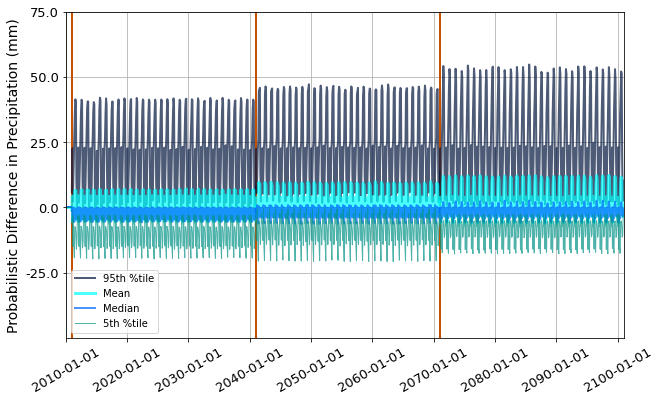

In [81]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( [TP_DICT[2][0], TP_DICT[2][0]], [MinPrecip, MaxPrecip], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax11.plot( [TP_DICT[3][0], TP_DICT[3][0]], [MinPrecip, MaxPrecip], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax11.plot( [TP_DICT[4][0], TP_DICT[4][0]], [MinPrecip, MaxPrecip], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax11.plot( S1PreStats1.index, S1PreStats1[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy', label='95th %tile', alpha=alphVal )
ax11.plot( S1PreStats2.index, S1PreStats2[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy', alpha=alphVal )
ax11.plot( S1PreStats3.index, S1PreStats3[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy', alpha=alphVal )
ax11.plot( S1PreStats4.index, S1PreStats4[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy', alpha=alphVal )
ax11.plot( S1PreStats1.index, S1PreStats1[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan', label='Mean', alpha=alphVal )
ax11.plot( S1PreStats2.index, S1PreStats2[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan', alpha=alphVal )
ax11.plot( S1PreStats3.index, S1PreStats3[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan', alpha=alphVal )
ax11.plot( S1PreStats4.index, S1PreStats4[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan', alpha=alphVal )
ax11.plot( S1PreStats1.index, S1PreStats1[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue', label='Median', alpha=alphVal)
ax11.plot( S1PreStats2.index, S1PreStats2[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue', alpha=alphVal )
ax11.plot( S1PreStats3.index, S1PreStats3[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue', alpha=alphVal )
ax11.plot( S1PreStats4.index, S1PreStats4[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue', alpha=alphVal )
ax11.plot( S1PreStats1.index, S1PreStats1[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:teal', label='5th %tile', alpha=alphVal )
ax11.plot( S1PreStats2.index, S1PreStats2[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:teal', alpha=alphVal )
ax11.plot( S1PreStats3.index, S1PreStats3[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:teal', alpha=alphVal )
ax11.plot( S1PreStats4.index, S1PreStats4[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:teal', alpha=alphVal )
ax11.set_xlim( (dt.datetime(2010, 1, 1), TP_DICT[4][1]))
ax11.set_yticks( preTicks )
ax11.set_ylim( (MinPrecip, MaxPrecip) )
ax11.grid(True, axis='y', which='both')
ax11.set_ylabel('Probabilistic Difference in Precipitation (mm)', fontsize=14)
ax11.grid( b=True )
ax11.legend( loc='lower left' )
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.tick_params(axis='x', which='major', labelrotation=30.0)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y-%m-%d") )

Fourier Smoothed

In [82]:
rft = np.fft.rfft( S1PreStats1[StatsHdsList[95]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_Pre1_95 = np.fft.irfft(rft)
rft = np.fft.rfft( S1PreStats2[StatsHdsList[95]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_Pre2_95 = np.fft.irfft(rft)
rft = np.fft.rfft( S1PreStats3[StatsHdsList[95]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_Pre3_95 = np.fft.irfft(rft)
rft = np.fft.rfft( S1PreStats4[StatsHdsList[95]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_Pre4_95 = np.fft.irfft(rft)
rft = np.fft.rfft( S1PreStats1[StatsHdsList[5]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_Pre1_5 = np.fft.irfft(rft)
rft = np.fft.rfft( S1PreStats2[StatsHdsList[5]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_Pre2_5 = np.fft.irfft(rft)
rft = np.fft.rfft( S1PreStats3[StatsHdsList[5]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_Pre3_5 = np.fft.irfft(rft)
rft = np.fft.rfft( S1PreStats4[StatsHdsList[5]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_Pre4_5 = np.fft.irfft(rft)
rft = np.fft.rfft( S1PreStats1[StatsHdsList[50]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_Pre1_50 = np.fft.irfft(rft)
rft = np.fft.rfft( S1PreStats2[StatsHdsList[50]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_Pre2_50 = np.fft.irfft(rft)
rft = np.fft.rfft( S1PreStats3[StatsHdsList[50]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_Pre3_50 = np.fft.irfft(rft)
rft = np.fft.rfft( S1PreStats4[StatsHdsList[50]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_Pre4_50 = np.fft.irfft(rft)
rft = np.fft.rfft( S1PreStats1[StatsHdsList[101]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_Pre1_me = np.fft.irfft(rft)
rft = np.fft.rfft( S1PreStats2[StatsHdsList[101]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_Pre2_me = np.fft.irfft(rft)
rft = np.fft.rfft( S1PreStats3[StatsHdsList[101]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_Pre3_me = np.fft.irfft(rft)
rft = np.fft.rfft( S1PreStats4[StatsHdsList[101]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_Pre4_me = np.fft.irfft(rft)

Make CI Fill

In [83]:
DTTL_2 = list( S1PreStats2.index.to_pydatetime() )
DTTL_3 = list( S1PreStats3.index.to_pydatetime() )
DTTL_4 = list( S1PreStats4.index.to_pydatetime() )
BackDTList = deepcopy( DTTL_2 )
BackDTTL_2 = BackDTList[::-1]
BackDTList = deepcopy( DTTL_3 )
BackDTTL_3 = BackDTList[::-1]
BackDTList = deepcopy( DTTL_4 )
BackDTTL_4 = BackDTList[::-1]
DTTimeList = deepcopy( DTTL_2 )
DTTimeList.extend( DTTL_3 )
DTTimeList.extend( DTTL_4 )
DTTimeList.extend( BackDTTL_4 )
DTTimeList.extend( BackDTTL_3 )
DTTimeList.extend( BackDTTL_2 )

In [84]:
Pre2_5 = list( FF_Pre2_5 )
Pre3_5 = list( FF_Pre3_5 )
Pre4_5 = list( FF_Pre4_5 )
BackDTList = list( FF_Pre4_95 )
BackPre4_95 = BackDTList[::-1]
BackDTList = list( FF_Pre3_95 )
BackPre3_95 = BackDTList[::-1]
BackDTList = list( FF_Pre2_95 )
BackPre2_95 = BackDTList[::-1]
PreVals = deepcopy( Pre2_5 )
PreVals.extend( Pre3_5 )
PreVals.extend( Pre4_5 )
PreVals.extend( BackPre4_95 )
PreVals.extend( BackPre3_95 )
PreVals.extend( BackPre2_95 )

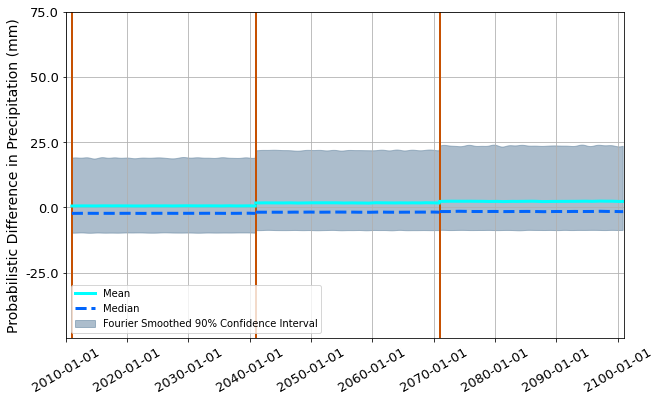

In [85]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( [TP_DICT[2][0], TP_DICT[2][0]], [MinPrecip, MaxPrecip], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax11.plot( [TP_DICT[3][0], TP_DICT[3][0]], [MinPrecip, MaxPrecip], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax11.plot( [TP_DICT[4][0], TP_DICT[4][0]], [MinPrecip, MaxPrecip], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
sfF = ax11.fill( DTTimeList, PreVals, color='xkcd:steel blue', alpha=0.50, 
                 label="Fourier Smoothed 90% Confidence Interval")
ax11.plot( S1PreStats2.index, FF_Pre2_me, linestyle='-',
           linewidth=3, color='xkcd:cyan', label='Mean' )
ax11.plot( S1PreStats3.index, FF_Pre3_me, linestyle='-',
           linewidth=3, color='xkcd:cyan' )
ax11.plot( S1PreStats4.index, FF_Pre4_me, linestyle='-',
           linewidth=3, color='xkcd:cyan' )
ax11.plot( S1PreStats2.index, FF_Pre2_50, linestyle='dashed',
           linewidth=3, color='xkcd:bright blue', label='Median' )
ax11.plot( S1PreStats3.index, FF_Pre3_50, linestyle='dashed',
           linewidth=3, color='xkcd:bright blue' )
ax11.plot( S1PreStats4.index, FF_Pre4_50, linestyle='dashed',
           linewidth=3, color='xkcd:bright blue' )
ax11.set_xlim( (dt.datetime(2010, 1, 1), TP_DICT[4][1]))
ax11.set_yticks( preTicks )
ax11.set_ylim( (MinPrecip, MaxPrecip) )
ax11.grid(True, axis='y', which='both')
ax11.set_ylabel('Probabilistic Difference in Precipitation (mm)', fontsize=14)
ax11.grid( b=True )
ax11.legend( loc='lower left' )
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.tick_params(axis='x', which='major', labelrotation=30.0)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y-%m-%d") )

### PET

In [86]:
S1MaxPET, S1MinPET

(29.396374820823613, 0.0)

In [87]:
MaxPET = 30.0
MinPET = -10.0

In [88]:
petTicks = [ 0.0, 10.0, 20.0, 30.0 ]

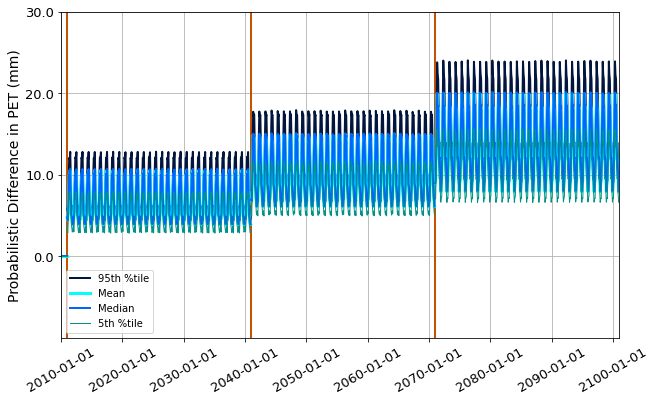

In [89]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( [TP_DICT[2][0], TP_DICT[2][0]], [MinPET, MaxPET], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax11.plot( [TP_DICT[3][0], TP_DICT[3][0]], [MinPET, MaxPET], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax11.plot( [TP_DICT[4][0], TP_DICT[4][0]], [MinPET, MaxPET], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax11.plot( S1PETStats1.index, S1PETStats1[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy', label='95th %tile')
ax11.plot( S1PETStats2.index, S1PETStats2[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy' )
ax11.plot( S1PETStats3.index, S1PETStats3[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy' )
ax11.plot( S1PETStats4.index, S1PETStats4[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy' )
ax11.plot( S1PETStats1.index, S1PETStats1[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan', label='Mean' )
ax11.plot( S1PETStats2.index, S1PETStats2[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan' )
ax11.plot( S1PETStats3.index, S1PETStats3[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan' )
ax11.plot( S1PETStats4.index, S1PETStats4[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan' )
ax11.plot( S1PETStats1.index, S1PETStats1[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue', label='Median')
ax11.plot( S1PETStats2.index, S1PETStats2[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue' )
ax11.plot( S1PETStats3.index, S1PETStats3[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue' )
ax11.plot( S1PETStats4.index, S1PETStats4[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue' )
ax11.plot( S1PETStats1.index, S1PETStats1[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:teal', label='5th %tile' )
ax11.plot( S1PETStats2.index, S1PETStats2[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:teal' )
ax11.plot( S1PETStats3.index, S1PETStats3[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:teal' )
ax11.plot( S1PETStats4.index, S1PETStats4[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:teal' )
ax11.set_xlim( (dt.datetime(2010, 1, 1), TP_DICT[4][1]))
ax11.set_yticks( petTicks )
ax11.set_ylim( (MinPET, MaxPET) )
ax11.grid(True, axis='y', which='both')
ax11.set_ylabel('Probabilistic Difference in PET (mm)', fontsize=14)
ax11.grid( b=True )
ax11.legend( loc='lower left' )
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.tick_params(axis='x', which='major', labelrotation=30.0)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y-%m-%d") )

Fourier Smoothed

In [90]:
rft = np.fft.rfft( S1PETStats1[StatsHdsList[95]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_PET1_95 = np.fft.irfft(rft)
rft = np.fft.rfft( S1PETStats2[StatsHdsList[95]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_PET2_95 = np.fft.irfft(rft)
rft = np.fft.rfft( S1PETStats3[StatsHdsList[95]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_PET3_95 = np.fft.irfft(rft)
rft = np.fft.rfft( S1PETStats4[StatsHdsList[95]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_PET4_95 = np.fft.irfft(rft)
rft = np.fft.rfft( S1PETStats1[StatsHdsList[5]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_PET1_5 = np.fft.irfft(rft)
rft = np.fft.rfft( S1PETStats2[StatsHdsList[5]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_PET2_5 = np.fft.irfft(rft)
rft = np.fft.rfft( S1PETStats3[StatsHdsList[5]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_PET3_5 = np.fft.irfft(rft)
rft = np.fft.rfft( S1PETStats4[StatsHdsList[5]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_PET4_5 = np.fft.irfft(rft)
rft = np.fft.rfft( S1PETStats1[StatsHdsList[50]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_PET1_50 = np.fft.irfft(rft)
rft = np.fft.rfft( S1PETStats2[StatsHdsList[50]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_PET2_50 = np.fft.irfft(rft)
rft = np.fft.rfft( S1PETStats3[StatsHdsList[50]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_PET3_50 = np.fft.irfft(rft)
rft = np.fft.rfft( S1PETStats4[StatsHdsList[50]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_PET4_50 = np.fft.irfft(rft)
rft = np.fft.rfft( S1PETStats1[StatsHdsList[101]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_PET1_me = np.fft.irfft(rft)
rft = np.fft.rfft( S1PETStats2[StatsHdsList[101]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_PET2_me = np.fft.irfft(rft)
rft = np.fft.rfft( S1PETStats3[StatsHdsList[101]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_PET3_me = np.fft.irfft(rft)
rft = np.fft.rfft( S1PETStats4[StatsHdsList[101]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_PET4_me = np.fft.irfft(rft)

Make CI Fill

In [91]:
PET2_5 = list( FF_PET2_5 )
PET3_5 = list( FF_PET3_5 )
PET4_5 = list( FF_PET4_5 )
BackDTList = list( FF_PET4_95 )
BackPET4_95 = BackDTList[::-1]
BackDTList = list( FF_PET3_95 )
BackPET3_95 = BackDTList[::-1]
BackDTList = list( FF_PET2_95 )
BackPET2_95 = BackDTList[::-1]
PETVals = deepcopy( PET2_5 )
PETVals.extend( PET3_5 )
PETVals.extend( PET4_5 )
PETVals.extend( BackPET4_95 )
PETVals.extend( BackPET3_95 )
PETVals.extend( BackPET2_95 )

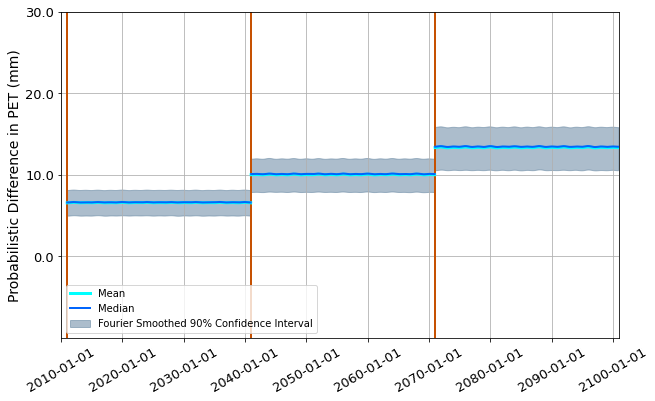

In [92]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( [TP_DICT[2][0], TP_DICT[2][0]], [MinPET, MaxPET], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax11.plot( [TP_DICT[3][0], TP_DICT[3][0]], [MinPET, MaxPET], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax11.plot( [TP_DICT[4][0], TP_DICT[4][0]], [MinPET, MaxPET], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
sfF = ax11.fill( DTTimeList, PETVals, color='xkcd:steel blue', alpha=0.50, 
                 label="Fourier Smoothed 90% Confidence Interval")
ax11.plot( S1PETStats2.index, FF_PET2_me, linestyle='-',
           linewidth=3, label='Mean', color='xkcd:cyan' )
ax11.plot( S1PETStats3.index, FF_PET3_me, linestyle='-',
           linewidth=3, color='xkcd:cyan' )
ax11.plot( S1PETStats4.index, FF_PET4_me, linestyle='-',
           linewidth=3, color='xkcd:cyan' )
ax11.plot( S1PETStats2.index, FF_PET2_50, linestyle='-',
           linewidth=2, label='Median', color='xkcd:bright blue' )
ax11.plot( S1PETStats3.index, FF_PET3_50, linestyle='-',
           linewidth=2, color='xkcd:bright blue' )
ax11.plot( S1PETStats4.index, FF_PET4_50, linestyle='-',
           linewidth=2, color='xkcd:bright blue' )
ax11.set_xlim( (dt.datetime(2010, 1, 1), TP_DICT[4][1]))
ax11.set_yticks( petTicks )
ax11.set_ylim( (MinPET, MaxPET) )
ax11.grid(True, axis='y', which='both')
ax11.set_ylabel('Probabilistic Difference in PET (mm)', fontsize=14)
ax11.grid( b=True )
ax11.legend( loc='lower left' )
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.tick_params(axis='x', which='major', labelrotation=30.0)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y-%m-%d") )

### AET

In [93]:
S1MaxAET, S1MinAET

(30.899353549419555, -28.71801031855177)

In [94]:
MaxAET = 50.0
MinAET = -50.0

In [95]:
aetTicks = [ -25.0, 0.0, 10.0, 25.0, 50.0 ]

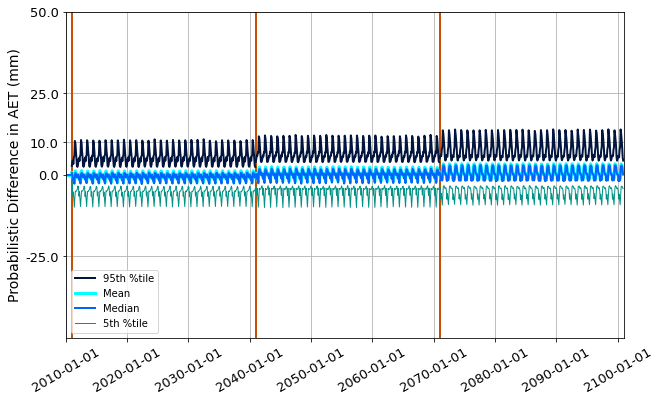

In [96]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( [TP_DICT[2][0], TP_DICT[2][0]], [MinAET, MaxAET], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax11.plot( [TP_DICT[3][0], TP_DICT[3][0]], [MinAET, MaxAET], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax11.plot( [TP_DICT[4][0], TP_DICT[4][0]], [MinAET, MaxAET], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax11.plot( S1AETStats1.index, S1AETStats1[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy', label='95th %tile')
ax11.plot( S1AETStats2.index, S1AETStats2[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy' )
ax11.plot( S1AETStats3.index, S1AETStats3[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy' )
ax11.plot( S1AETStats4.index, S1AETStats4[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy' )
ax11.plot( S1AETStats1.index, S1AETStats1[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan', label='Mean' )
ax11.plot( S1AETStats2.index, S1AETStats2[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan' )
ax11.plot( S1AETStats3.index, S1AETStats3[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan' )
ax11.plot( S1AETStats4.index, S1AETStats4[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan' )
ax11.plot( S1AETStats1.index, S1AETStats1[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue', label='Median')
ax11.plot( S1AETStats2.index, S1AETStats2[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue' )
ax11.plot( S1AETStats3.index, S1AETStats3[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue' )
ax11.plot( S1AETStats4.index, S1AETStats4[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue' )
ax11.plot( S1AETStats1.index, S1AETStats1[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:teal', label='5th %tile' )
ax11.plot( S1AETStats2.index, S1AETStats2[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:teal' )
ax11.plot( S1AETStats3.index, S1AETStats3[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:teal' )
ax11.plot( S1AETStats4.index, S1AETStats4[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:teal' )
ax11.set_xlim( (dt.datetime(2010, 1, 1), TP_DICT[4][1]))
ax11.set_yticks( aetTicks )
ax11.set_ylim( (MinAET, MaxAET) )
ax11.grid(True, axis='y', which='both')
ax11.set_ylabel('Probabilistic Difference in AET (mm)', fontsize=14)
ax11.grid( b=True )
ax11.legend( loc='lower left' )
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.tick_params(axis='x', which='major', labelrotation=30.0)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y-%m-%d") )

Fourier Smoothed

In [97]:
rft = np.fft.rfft( S1AETStats1[StatsHdsList[95]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_AET1_95 = np.fft.irfft(rft)
rft = np.fft.rfft( S1AETStats2[StatsHdsList[95]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_AET2_95 = np.fft.irfft(rft)
rft = np.fft.rfft( S1AETStats3[StatsHdsList[95]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_AET3_95 = np.fft.irfft(rft)
rft = np.fft.rfft( S1AETStats4[StatsHdsList[95]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_AET4_95 = np.fft.irfft(rft)
rft = np.fft.rfft( S1AETStats1[StatsHdsList[5]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_AET1_5 = np.fft.irfft(rft)
rft = np.fft.rfft( S1AETStats2[StatsHdsList[5]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_AET2_5 = np.fft.irfft(rft)
rft = np.fft.rfft( S1AETStats3[StatsHdsList[5]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_AET3_5 = np.fft.irfft(rft)
rft = np.fft.rfft( S1AETStats4[StatsHdsList[5]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_AET4_5 = np.fft.irfft(rft)
rft = np.fft.rfft( S1AETStats1[StatsHdsList[50]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_AET1_50 = np.fft.irfft(rft)
rft = np.fft.rfft( S1AETStats2[StatsHdsList[50]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_AET2_50 = np.fft.irfft(rft)
rft = np.fft.rfft( S1AETStats3[StatsHdsList[50]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_AET3_50 = np.fft.irfft(rft)
rft = np.fft.rfft( S1AETStats4[StatsHdsList[50]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_AET4_50 = np.fft.irfft(rft)
rft = np.fft.rfft( S1AETStats1[StatsHdsList[101]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_AET1_me = np.fft.irfft(rft)
rft = np.fft.rfft( S1AETStats2[StatsHdsList[101]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_AET2_me = np.fft.irfft(rft)
rft = np.fft.rfft( S1AETStats3[StatsHdsList[101]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_AET3_me = np.fft.irfft(rft)
rft = np.fft.rfft( S1AETStats4[StatsHdsList[101]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_AET4_me = np.fft.irfft(rft)

Make CI Fill

In [98]:
AET2_5 = list( FF_AET2_5 )
AET3_5 = list( FF_AET3_5 )
AET4_5 = list( FF_AET4_5 )
BackDTList = list( FF_AET4_95 )
BackAET4_95 = BackDTList[::-1]
BackDTList = list( FF_AET3_95 )
BackAET3_95 = BackDTList[::-1]
BackDTList = list( FF_AET2_95 )
BackAET2_95 = BackDTList[::-1]
AETVals = deepcopy( AET2_5 )
AETVals.extend( AET3_5 )
AETVals.extend( AET4_5 )
AETVals.extend( BackAET4_95 )
AETVals.extend( BackAET3_95 )
AETVals.extend( BackAET2_95 )

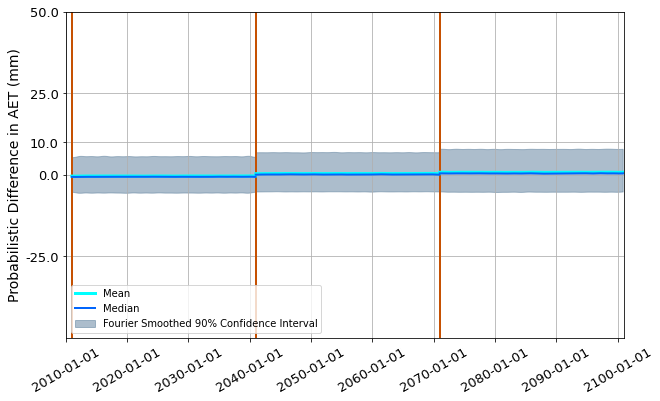

In [99]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( [TP_DICT[2][0], TP_DICT[2][0]], [MinAET, MaxAET], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax11.plot( [TP_DICT[3][0], TP_DICT[3][0]], [MinAET, MaxAET], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax11.plot( [TP_DICT[4][0], TP_DICT[4][0]], [MinAET, MaxAET], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
sfF = ax11.fill( DTTimeList, AETVals, color='xkcd:steel blue', alpha=0.50, 
                 label="Fourier Smoothed 90% Confidence Interval")
ax11.plot( S1AETStats2.index, FF_AET2_me, linestyle='-',
           linewidth=3, color='xkcd:cyan', label='Mean' )
ax11.plot( S1AETStats3.index, FF_AET3_me, linestyle='-',
           linewidth=3, color='xkcd:cyan' )
ax11.plot( S1AETStats4.index, FF_AET4_me, linestyle='-',
           linewidth=3, color='xkcd:cyan' )
ax11.plot( S1AETStats2.index, FF_AET2_50, linestyle='-',
           linewidth=2, color='xkcd:bright blue', label='Median' )
ax11.plot( S1AETStats3.index, FF_AET3_50, linestyle='-',
           linewidth=2, color='xkcd:bright blue' )
ax11.plot( S1AETStats4.index, FF_AET4_50, linestyle='-',
           linewidth=2, color='xkcd:bright blue' )
ax11.set_xlim( (dt.datetime(2010, 1, 1), TP_DICT[4][1]))
ax11.set_yticks( aetTicks )
ax11.set_ylim( (MinAET, MaxAET) )
ax11.grid(True, axis='y', which='both')
ax11.set_ylabel('Probabilistic Difference in AET (mm)', fontsize=14)
ax11.grid( b=True )
ax11.legend( loc='lower left' )
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.tick_params(axis='x', which='major', labelrotation=30.0)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y-%m-%d") )

### Runoff (RO)

In [100]:
S1MaxRO, S1MinRO

(172.77208134835936, -102.3896491389604)

In [101]:
MaxRO = 3.0
MinRO = -2.0

In [102]:
roTicks = [ -1.0, 0.0, 1.0, 2.0, 3.0 ]

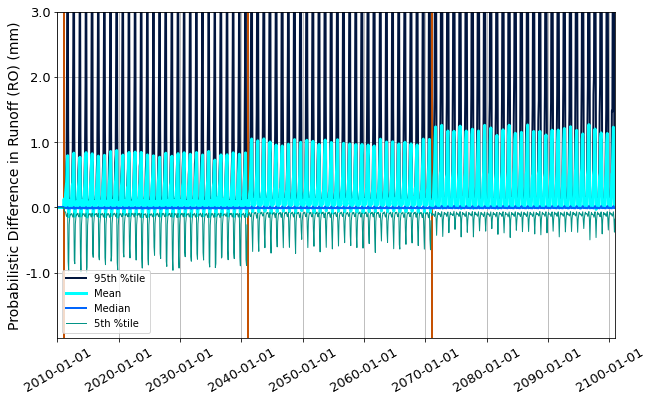

In [103]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( [TP_DICT[2][0], TP_DICT[2][0]], [MinRO, MaxRO], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax11.plot( [TP_DICT[3][0], TP_DICT[3][0]], [MinRO, MaxRO], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax11.plot( [TP_DICT[4][0], TP_DICT[4][0]], [MinRO, MaxRO], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax11.plot( S1ROStats1.index, S1ROStats1[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy', label='95th %tile')
ax11.plot( S1ROStats2.index, S1ROStats2[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy' )
ax11.plot( S1ROStats3.index, S1ROStats3[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy' )
ax11.plot( S1ROStats4.index, S1ROStats4[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy' )
ax11.plot( S1ROStats1.index, S1ROStats1[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan', label='Mean' )
ax11.plot( S1ROStats2.index, S1ROStats2[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan' )
ax11.plot( S1ROStats3.index, S1ROStats3[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan' )
ax11.plot( S1ROStats4.index, S1ROStats4[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan' )
ax11.plot( S1ROStats1.index, S1ROStats1[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue', label='Median')
ax11.plot( S1ROStats2.index, S1ROStats2[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue' )
ax11.plot( S1ROStats3.index, S1ROStats3[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue' )
ax11.plot( S1ROStats4.index, S1ROStats4[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue' )
ax11.plot( S1ROStats1.index, S1ROStats1[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:teal', label='5th %tile' )
ax11.plot( S1ROStats2.index, S1ROStats2[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:teal' )
ax11.plot( S1ROStats3.index, S1ROStats3[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:teal' )
ax11.plot( S1ROStats4.index, S1ROStats4[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:teal' )
ax11.set_xlim( (dt.datetime(2010, 1, 1), TP_DICT[4][1]))
ax11.set_yticks( roTicks )
ax11.set_ylim( (MinRO, MaxRO) )
ax11.grid(True, axis='y', which='both')
ax11.set_ylabel('Probabilistic Difference in Runoff (RO) (mm)', fontsize=14)
ax11.grid( b=True )
ax11.legend( loc='lower left' )
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.tick_params(axis='x', which='major', labelrotation=30.0)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y-%m-%d") )

Fourier Smoothed

In [104]:
rft = np.fft.rfft( S1ROStats1[StatsHdsList[95]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RO1_95 = np.fft.irfft(rft)
rft = np.fft.rfft( S1ROStats2[StatsHdsList[95]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RO2_95 = np.fft.irfft(rft)
rft = np.fft.rfft( S1ROStats3[StatsHdsList[95]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RO3_95 = np.fft.irfft(rft)
rft = np.fft.rfft( S1ROStats4[StatsHdsList[95]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RO4_95 = np.fft.irfft(rft)
rft = np.fft.rfft( S1ROStats1[StatsHdsList[5]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RO1_5 = np.fft.irfft(rft)
rft = np.fft.rfft( S1ROStats2[StatsHdsList[5]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RO2_5 = np.fft.irfft(rft)
rft = np.fft.rfft( S1ROStats3[StatsHdsList[5]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RO3_5 = np.fft.irfft(rft)
rft = np.fft.rfft( S1ROStats4[StatsHdsList[5]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RO4_5 = np.fft.irfft(rft)
rft = np.fft.rfft( S1ROStats1[StatsHdsList[50]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RO1_50 = np.fft.irfft(rft)
rft = np.fft.rfft( S1ROStats2[StatsHdsList[50]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RO2_50 = np.fft.irfft(rft)
rft = np.fft.rfft( S1ROStats3[StatsHdsList[50]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RO3_50 = np.fft.irfft(rft)
rft = np.fft.rfft( S1ROStats4[StatsHdsList[50]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RO4_50 = np.fft.irfft(rft)
rft = np.fft.rfft( S1ROStats1[StatsHdsList[101]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RO1_me = np.fft.irfft(rft)
rft = np.fft.rfft( S1ROStats2[StatsHdsList[101]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RO2_me = np.fft.irfft(rft)
rft = np.fft.rfft( S1ROStats3[StatsHdsList[101]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RO3_me = np.fft.irfft(rft)
rft = np.fft.rfft( S1ROStats4[StatsHdsList[101]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RO4_me = np.fft.irfft(rft)

Make CI Fill

In [105]:
RO2_5 = list( FF_RO2_5 )
RO3_5 = list( FF_RO3_5 )
RO4_5 = list( FF_RO4_5 )
BackDTList = list( FF_RO4_95 )
BackRO4_95 = BackDTList[::-1]
BackDTList = list( FF_RO3_95 )
BackRO3_95 = BackDTList[::-1]
BackDTList = list( FF_RO2_95 )
BackRO2_95 = BackDTList[::-1]
ROVals = deepcopy( RO2_5 )
ROVals.extend( RO3_5 )
ROVals.extend( RO4_5 )
ROVals.extend( BackRO4_95 )
ROVals.extend( BackRO3_95 )
ROVals.extend( BackRO2_95 )

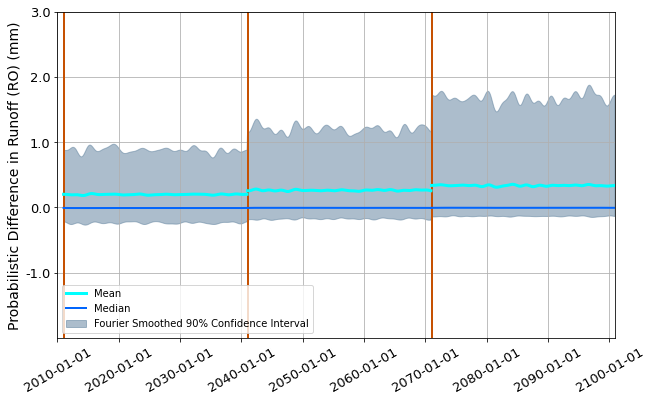

In [106]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( [TP_DICT[2][0], TP_DICT[2][0]], [MinRO, MaxRO], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax11.plot( [TP_DICT[3][0], TP_DICT[3][0]], [MinRO, MaxRO], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax11.plot( [TP_DICT[4][0], TP_DICT[4][0]], [MinRO, MaxRO], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
sfF = ax11.fill( DTTimeList, ROVals, color='xkcd:steel blue', alpha=0.50, 
                 label="Fourier Smoothed 90% Confidence Interval")
ax11.plot( S1ROStats2.index, FF_RO2_me, linestyle='-',
           linewidth=3, color='xkcd:cyan', label='Mean' )
ax11.plot( S1ROStats3.index, FF_RO3_me, linestyle='-',
           linewidth=3, color='xkcd:cyan' )
ax11.plot( S1ROStats4.index, FF_RO4_me, linestyle='-',
           linewidth=3, color='xkcd:cyan' )
ax11.plot( S1ROStats2.index, FF_RO2_50, linestyle='-',
           linewidth=2, color='xkcd:bright blue', label='Median' )
ax11.plot( S1ROStats3.index, FF_RO3_50, linestyle='-',
           linewidth=2, color='xkcd:bright blue' )
ax11.plot( S1ROStats4.index, FF_RO4_50, linestyle='-',
           linewidth=2, color='xkcd:bright blue' )
ax11.set_xlim( (dt.datetime(2010, 1, 1), TP_DICT[4][1]))
ax11.set_yticks( roTicks )
ax11.set_ylim( (MinRO, MaxRO) )
ax11.grid(True, axis='y', which='both')
ax11.set_ylabel('Probabilistic Difference in Runoff (RO) (mm)', fontsize=14)
ax11.grid( b=True )
ax11.legend( loc='lower left' )
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.tick_params(axis='x', which='major', labelrotation=30.0)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y-%m-%d") )

### Recharge (Re)

In [107]:
S1MaxRE, S1MinRE

(224.82097444485575, -63.380073133091095)

In [108]:
MaxRE = 50.0
MinRE = -20.0

In [109]:
reTicks = [ -20.0, -10.0, 0.0, 10.0, 20.0, 30.0, 40.0, 50.0 ]

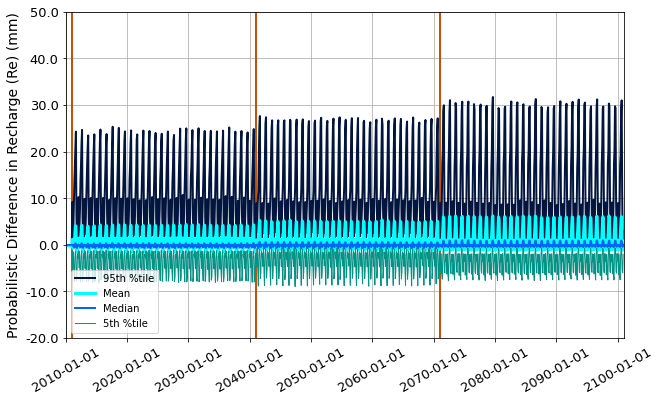

In [110]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( [TP_DICT[2][0], TP_DICT[2][0]], [MinRE, MaxRE], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax11.plot( [TP_DICT[3][0], TP_DICT[3][0]], [MinRE, MaxRE], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax11.plot( [TP_DICT[4][0], TP_DICT[4][0]], [MinRE, MaxRE], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax11.plot( S1REStats1.index, S1REStats1[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy', label='95th %tile')
ax11.plot( S1REStats2.index, S1REStats2[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy' )
ax11.plot( S1REStats3.index, S1REStats3[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy' )
ax11.plot( S1REStats4.index, S1REStats4[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy' )
ax11.plot( S1REStats1.index, S1REStats1[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan', label='Mean' )
ax11.plot( S1REStats2.index, S1REStats2[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan' )
ax11.plot( S1REStats3.index, S1REStats3[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan' )
ax11.plot( S1REStats4.index, S1REStats4[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan' )
ax11.plot( S1REStats1.index, S1REStats1[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue', label='Median')
ax11.plot( S1REStats2.index, S1REStats2[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue' )
ax11.plot( S1REStats3.index, S1REStats3[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue' )
ax11.plot( S1REStats4.index, S1REStats4[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue' )
ax11.plot( S1REStats1.index, S1REStats1[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:teal', label='5th %tile' )
ax11.plot( S1REStats2.index, S1REStats2[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:teal' )
ax11.plot( S1REStats3.index, S1REStats3[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:teal' )
ax11.plot( S1REStats4.index, S1REStats4[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:teal' )
ax11.set_xlim( (dt.datetime(2010, 1, 1), TP_DICT[4][1]))
ax11.set_yticks( reTicks )
ax11.set_ylim( (MinRE, MaxRE) )
ax11.grid(True, axis='y', which='both')
ax11.set_ylabel('Probabilistic Difference in Recharge (Re) (mm)', fontsize=14)
ax11.grid( b=True )
ax11.legend( loc='lower left' )
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.tick_params(axis='x', which='major', labelrotation=30.0)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y-%m-%d") )

Fourier Smoothed

In [111]:
rft = np.fft.rfft( S1REStats1[StatsHdsList[95]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RE1_95 = np.fft.irfft(rft)
rft = np.fft.rfft( S1REStats2[StatsHdsList[95]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RE2_95 = np.fft.irfft(rft)
rft = np.fft.rfft( S1REStats3[StatsHdsList[95]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RE3_95 = np.fft.irfft(rft)
rft = np.fft.rfft( S1REStats4[StatsHdsList[95]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RE4_95 = np.fft.irfft(rft)
rft = np.fft.rfft( S1REStats1[StatsHdsList[5]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RE1_5 = np.fft.irfft(rft)
rft = np.fft.rfft( S1REStats2[StatsHdsList[5]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RE2_5 = np.fft.irfft(rft)
rft = np.fft.rfft( S1REStats3[StatsHdsList[5]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RE3_5 = np.fft.irfft(rft)
rft = np.fft.rfft( S1REStats4[StatsHdsList[5]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RE4_5 = np.fft.irfft(rft)
rft = np.fft.rfft( S1REStats1[StatsHdsList[50]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RE1_50 = np.fft.irfft(rft)
rft = np.fft.rfft( S1REStats2[StatsHdsList[50]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RE2_50 = np.fft.irfft(rft)
rft = np.fft.rfft( S1REStats3[StatsHdsList[50]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RE3_50 = np.fft.irfft(rft)
rft = np.fft.rfft( S1REStats4[StatsHdsList[50]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RE4_50 = np.fft.irfft(rft)
rft = np.fft.rfft( S1REStats1[StatsHdsList[101]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RE1_me = np.fft.irfft(rft)
rft = np.fft.rfft( S1REStats2[StatsHdsList[101]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RE2_me = np.fft.irfft(rft)
rft = np.fft.rfft( S1REStats3[StatsHdsList[101]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RE3_me = np.fft.irfft(rft)
rft = np.fft.rfft( S1REStats4[StatsHdsList[101]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RE4_me = np.fft.irfft(rft)

Make CI Fill

In [112]:
RE2_5 = list( FF_RE2_5 )
RE3_5 = list( FF_RE3_5 )
RE4_5 = list( FF_RE4_5 )
BackDTList = list( FF_RE4_95 )
BackRE4_95 = BackDTList[::-1]
BackDTList = list( FF_RE3_95 )
BackRE3_95 = BackDTList[::-1]
BackDTList = list( FF_RE2_95 )
BackRE2_95 = BackDTList[::-1]
REVals = deepcopy( RE2_5 )
REVals.extend( RE3_5 )
REVals.extend( RE4_5 )
REVals.extend( BackRE4_95 )
REVals.extend( BackRE3_95 )
REVals.extend( BackRE2_95 )

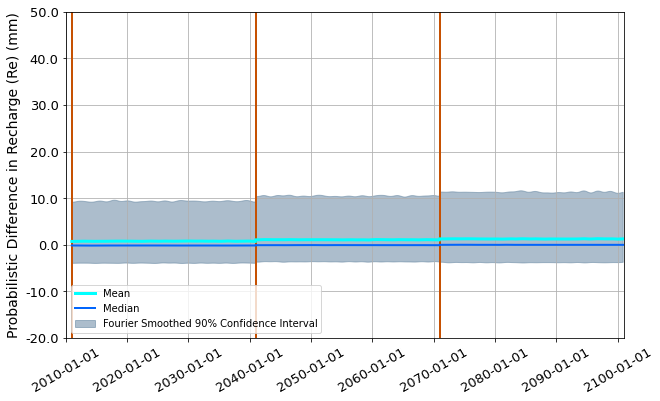

In [113]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( [TP_DICT[2][0], TP_DICT[2][0]], [MinRE, MaxRE], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax11.plot( [TP_DICT[3][0], TP_DICT[3][0]], [MinRE, MaxRE], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax11.plot( [TP_DICT[4][0], TP_DICT[4][0]], [MinRE, MaxRE], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
sfF = ax11.fill( DTTimeList, REVals, color='xkcd:steel blue', alpha=0.50, 
                 label="Fourier Smoothed 90% Confidence Interval")
ax11.plot( S1REStats2.index, FF_RE2_me, linestyle='-',
           linewidth=3, color='xkcd:cyan', label='Mean' )
ax11.plot( S1REStats3.index, FF_RE3_me, linestyle='-',
           linewidth=3, color='xkcd:cyan' )
ax11.plot( S1REStats4.index, FF_RE4_me, linestyle='-',
           linewidth=3, color='xkcd:cyan' )
ax11.plot( S1REStats2.index, FF_RE2_50, linestyle='-',
           linewidth=2, color='xkcd:bright blue', label='Median' )
ax11.plot( S1REStats3.index, FF_RE3_50, linestyle='-',
           linewidth=2, color='xkcd:bright blue' )
ax11.plot( S1REStats4.index, FF_RE4_50, linestyle='-',
           linewidth=2, color='xkcd:bright blue' )
ax11.set_xlim( (dt.datetime(2010, 1, 1), TP_DICT[4][1]))
ax11.set_yticks( reTicks )
ax11.set_ylim( (MinRE, MaxRE) )
ax11.grid(True, axis='y', which='both')
ax11.set_ylabel('Probabilistic Difference in Recharge (Re) (mm)', fontsize=14)
ax11.grid( b=True )
ax11.legend( loc='lower left' )
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.tick_params(axis='x', which='major', labelrotation=30.0)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y-%m-%d") )

### Water Availability

In [114]:
S1MaxWA, S1MinWA

(330.2716521900154, -139.37888932751434)

In [115]:
MaxWA = 50.0
MinWA = -50.0

In [116]:
waTicks = [ -40.0, -20.0, 0.0, 20.0, 40.0 ]
waTicks

[-40.0, -20.0, 0.0, 20.0, 40.0]

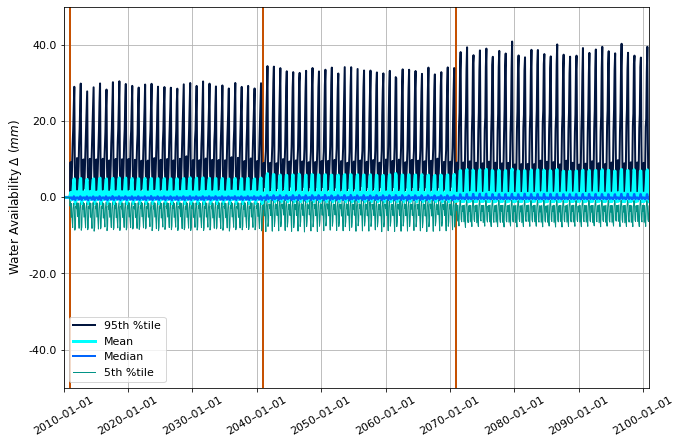

In [117]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.5, 7.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( [TP_DICT[2][0], TP_DICT[2][0]], [MinWA, MaxWA], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax11.plot( [TP_DICT[3][0], TP_DICT[3][0]], [MinWA, MaxWA], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax11.plot( [TP_DICT[4][0], TP_DICT[4][0]], [MinWA, MaxWA], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax11.plot( S1WatAv.index, S1WatAv[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy', label='95th %tile')
ax11.plot( S1WatAv.index, S1WatAv[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan', label='Mean' )
ax11.plot( S1WatAv.index, S1WatAv[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue', label='Median')
ax11.plot( S1WatAv.index, S1WatAv[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:teal', label='5th %tile' )
ax11.set_xlim( (dt.datetime(2010, 1, 1), TP_DICT[4][1]))
ax11.set_yticks( waTicks )
ax11.set_ylim( (MinWA, MaxWA) )
ax11.grid(True, axis='y', which='both')
ax11.set_ylabel('Water Availability $\Delta$ ($mm$)', fontsize=12)
ax11.grid( b=True )
ax11.legend( loc='lower left', fontsize=11 )
ax11.tick_params(axis='both', which='major', labelsize=11)
ax11.tick_params(axis='x', which='major', labelrotation=30.0)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y–%m–%d") )

In [118]:
GoodLen = len( S1WatAv )
GoodLen

1440

In [119]:
# Butterworth filter
wAr = S1WatAv[StatsHdsList[95]].to_numpy()
FF_WA_95 = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = S1WatAv[StatsHdsList[5]].to_numpy()
FF_WA_5 = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = S1WatAv[StatsHdsList[75]].to_numpy()
FF_WA_75 = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = S1WatAv[StatsHdsList[25]].to_numpy()
FF_WA_25 = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = S1WatAv[StatsHdsList[50]].to_numpy()
FF_WA_50 = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = S1WatAv[StatsHdsList[101]].to_numpy()
FF_WA_me = butter_lowpass_filter(wAr, CUTOFF, FS )

In [120]:
DTTL = list( S1WatAv.index.to_pydatetime() )
BackDTList = DTTL[::-1]
fDTTimeList = deepcopy( DTTL )
fDTTimeList.extend( BackDTList )

In [121]:
WA_5 = list( FF_WA_5 )
BackDTList = list( FF_WA_95 )
BackWA_95 = BackDTList[::-1]
WAVals90 = deepcopy( WA_5 )
WAVals90.extend( BackWA_95 )

In [122]:
WA_25 = list( FF_WA_25 )
BackDTList = list( FF_WA_75 )
BackWA_75 = BackDTList[::-1]
WAVals50 = deepcopy( WA_25 )
WAVals50.extend( BackWA_75 )

In [123]:
MaxWA = 30.0
MinWA = -20.0

In [124]:
waTicks = [ -10.0, 0.0, 10.0, 20.0, 30.0 ]

In [125]:
OutSVG = os.path.normpath( os.path.join( OUT_DIR, "Results_DeltaWA_%s.svg" % SIM_ROOT ) )
OutSVG

'C:\\Users\\nmart\\Documents\\CC_Plots\\Results_DeltaWA_DCmH_Del_.svg'

In [126]:
OutPNG = os.path.normpath( os.path.join( OUT_DIR, "Results_DeltaWA_%s.png" % SIM_ROOT ) )
OutPNG

'C:\\Users\\nmart\\Documents\\CC_Plots\\Results_DeltaWA_DCmH_Del_.png'

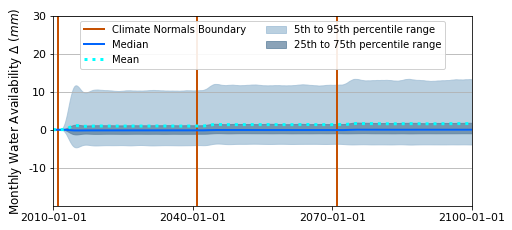

In [127]:
Fig1 = plt.figure()
Fig1.set_size_inches(7.5, 3.5)
ax11 = Fig1.add_subplot(111)
ax11.plot( [TP_DICT[2][0], TP_DICT[2][0]], [MinWA, MaxWA], linestyle='-',
           linewidth=2, color='xkcd:dark orange', label="Climate Normals Boundary")
ax11.plot( [TP_DICT[3][0], TP_DICT[3][0]], [MinWA, MaxWA], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax11.plot( [TP_DICT[4][0], TP_DICT[4][0]], [MinWA, MaxWA], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
sF90 = ax11.fill( fDTTimeList, WAVals90, color='xkcd:light grey blue', alpha=0.70, 
                  label="5th to 95th percentile range")
sF50 = ax11.fill( fDTTimeList, WAVals50, color='xkcd:steel blue', alpha=0.70, 
                  label="25th to 75th percentile range")
ax11.plot( S1WatAv.index, FF_WA_50, linestyle='-',
           linewidth=2, color='xkcd:bright blue', label='Median' )
ax11.plot( S1WatAv.index, FF_WA_me, linestyle=':',
           linewidth=3, color='xkcd:cyan', label='Mean' )
ax11.set_xticks( [ dt.datetime(2010, 1, 1), dt.datetime(2040, 1, 1), dt.datetime(2070, 1, 1),
                  dt.datetime(2100, 1, 1) ] )
ax11.set_xlim( (dt.datetime(2010, 1, 1), dt.datetime(2100, 1, 1)))
ax11.set_yticks( waTicks )
ax11.set_ylim( (MinWA, MaxWA) )
ax11.grid(True, axis='y', which='both')
ax11.set_ylabel('Monthly Water Availability $\Delta$ ($mm$)', fontsize=12)
ax11.legend( loc='upper center', ncol=2, fontsize=10, framealpha=0.9 )
ax11.tick_params(axis='both', which='major', labelsize=11)
ax11.tick_params(axis='x', which='major' )
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y–%m–%d") )
Fig1.savefig( OutSVG )
Fig1.savefig( OutPNG )

In [128]:
MaxWA = 20.0
MinWA = -20.0

In [129]:
waTicks = [ 0.0, 10.0, 20.0 ]

In [130]:
OutSVG = os.path.normpath( os.path.join( OUT_DIR, "Results_DeltaWA_FRot_%s.svg" % SIM_ROOT ) )
OutSVG

'C:\\Users\\nmart\\Documents\\CC_Plots\\Results_DeltaWA_FRot_DCmH_Del_.svg'

In [131]:
OutPNG = os.path.normpath( os.path.join( OUT_DIR, "Results_DeltaWA_FRot_%s.png" % SIM_ROOT ) )
OutPNG

'C:\\Users\\nmart\\Documents\\CC_Plots\\Results_DeltaWA_FRot_DCmH_Del_.png'

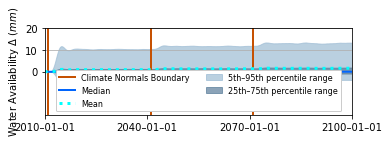

In [132]:
Fig1 = plt.figure()
Fig1.set_size_inches(5.5, 1.6)
ax11 = Fig1.add_subplot(111)
ax11.plot( [TP_DICT[2][0], TP_DICT[2][0]], [MinWA, MaxWA], linestyle='-',
           linewidth=2, color='xkcd:dark orange', label="Climate Normals Boundary")
ax11.plot( [TP_DICT[3][0], TP_DICT[3][0]], [MinWA, MaxWA], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax11.plot( [TP_DICT[4][0], TP_DICT[4][0]], [MinWA, MaxWA], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
sF90 = ax11.fill( fDTTimeList, WAVals90, color='xkcd:light grey blue', alpha=0.70, 
                  label="5th–95th percentile range")
sF50 = ax11.fill( fDTTimeList, WAVals50, color='xkcd:steel blue', alpha=0.70, 
                  label="25th–75th percentile range")
ax11.plot( S1WatAv.index, FF_WA_50, linestyle='-',
           linewidth=2, color='xkcd:bright blue', label='Median' )
ax11.plot( S1WatAv.index, FF_WA_me, linestyle=':',
           linewidth=3, color='xkcd:cyan', label='Mean' )
ax11.set_xticks( [ dt.datetime(2010, 1, 1), dt.datetime(2040, 1, 1), dt.datetime(2070, 1, 1),
                  dt.datetime(2100, 1, 1) ] )
ax11.set_xlim( (dt.datetime(2010, 1, 1), dt.datetime(2100, 1, 1)))
ax11.set_yticks( waTicks )
ax11.set_ylim( (MinWA, MaxWA) )
ax11.grid(True, axis='y', which='both')
ax11.set_ylabel('Water Availability $\Delta$ ($mm$)', fontsize=10)
ax11.legend( loc='lower center', ncol=2, fontsize=8, framealpha=1.0 )
ax11.tick_params(axis='both', which='major', labelsize=10)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y–%m–%d") )
Fig1.savefig( OutSVG )
Fig1.savefig( OutPNG )

### All 5 Plots Together

In [133]:
OutSVG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "Results_DeltaWB_%s.svg" % SIM_ROOT ) )
OutSVG

'C:\\Users\\nmart\\Documents\\CC_Plots\\Plots\\Results_DeltaWB_DCmH_Del_.svg'

In [134]:
OutPNG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "Results_DeltaWB_%s.png" % SIM_ROOT ) )
OutPNG

'C:\\Users\\nmart\\Documents\\CC_Plots\\Plots\\Results_DeltaWB_DCmH_Del_.png'

In [135]:
alphVal = 0.85

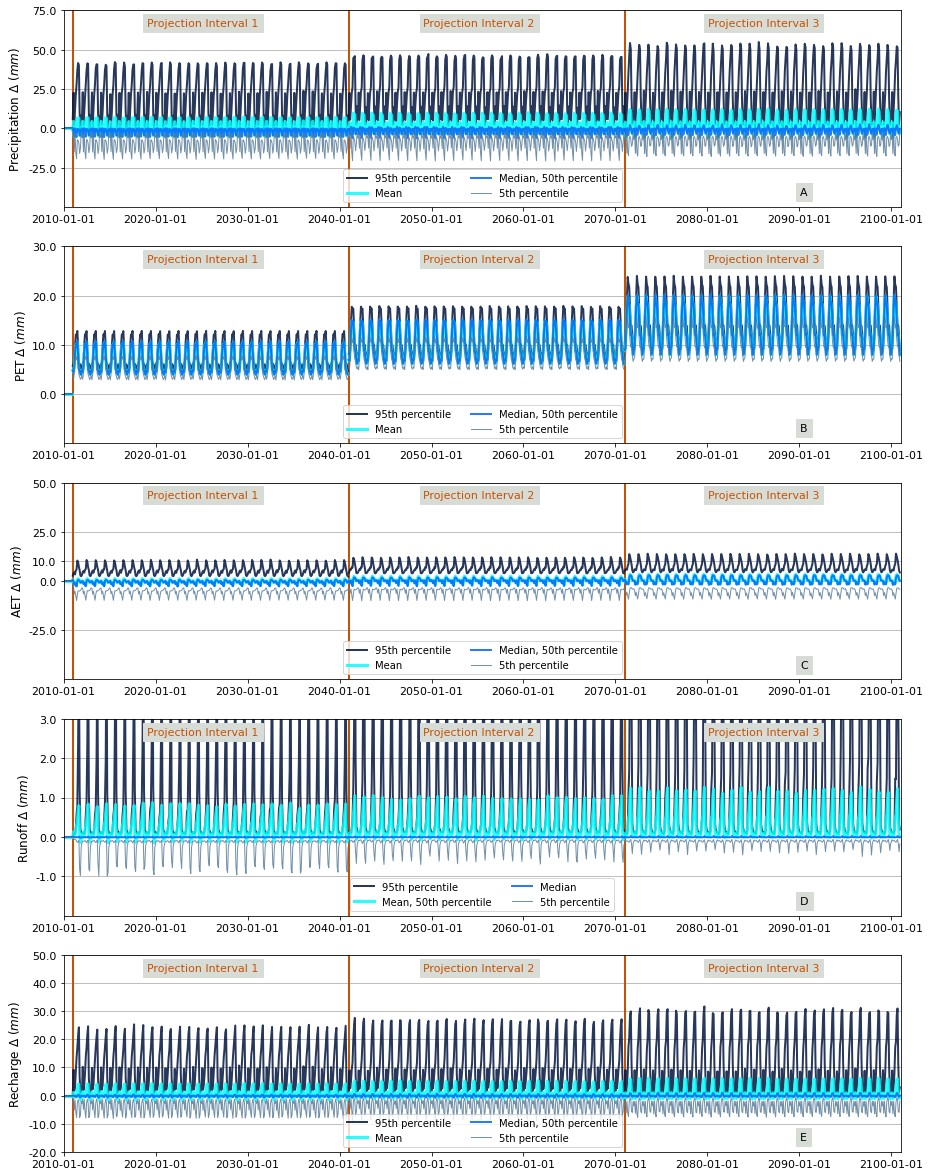

In [136]:
Fig1 = plt.figure()
Fig1.set_size_inches(15, 21)
ax11 = Fig1.add_subplot(5,1,1)
ax11.plot( [TP_DICT[2][0], TP_DICT[2][0]], [MinPrecip, MaxPrecip], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax11.plot( [TP_DICT[3][0], TP_DICT[3][0]], [MinPrecip, MaxPrecip], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax11.plot( [TP_DICT[4][0], TP_DICT[4][0]], [MinPrecip, MaxPrecip], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax11.plot( S1PreStats1.index, S1PreStats1[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy', label='95th percentile', alpha=alphVal )
ax11.plot( S1PreStats2.index, S1PreStats2[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy', alpha=alphVal )
ax11.plot( S1PreStats3.index, S1PreStats3[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy', alpha=alphVal )
ax11.plot( S1PreStats4.index, S1PreStats4[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy', alpha=alphVal )
ax11.plot( S1PreStats1.index, S1PreStats1[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan', label='Mean', alpha=alphVal )
ax11.plot( S1PreStats2.index, S1PreStats2[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan', alpha=alphVal )
ax11.plot( S1PreStats3.index, S1PreStats3[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan', alpha=alphVal )
ax11.plot( S1PreStats4.index, S1PreStats4[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan', alpha=alphVal )
ax11.plot( S1PreStats1.index, S1PreStats1[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue', label='Median, 50th percentile', alpha=alphVal)
ax11.plot( S1PreStats2.index, S1PreStats2[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue', alpha=alphVal )
ax11.plot( S1PreStats3.index, S1PreStats3[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue', alpha=alphVal )
ax11.plot( S1PreStats4.index, S1PreStats4[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue', alpha=alphVal )
ax11.plot( S1PreStats1.index, S1PreStats1[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:steel blue', label='5th percentile', alpha=alphVal )
ax11.plot( S1PreStats2.index, S1PreStats2[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:steel blue', alpha=alphVal )
ax11.plot( S1PreStats3.index, S1PreStats3[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:steel blue', alpha=alphVal )
ax11.plot( S1PreStats4.index, S1PreStats4[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:steel blue', alpha=alphVal )
ax11.set_xlim( (dt.datetime(2010, 1, 1), TP_DICT[4][1]))
ax11.set_yticks( preTicks )
ax11.set_ylim( (MinPrecip, MaxPrecip) )
ax11.grid(True, axis='y', which='both')
ax11.set_ylabel('Precipitation $\Delta$ ($mm$)', fontsize=12)
ax11.legend( loc='lower center', fontsize=10.0, ncol=2)
ax11.tick_params(axis='both', which='major', labelsize=11)
ax11.tick_params(axis='x', which='major', labelrotation=0.0)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y-%m-%d") )
ax11.annotate("A", xy=(0.88,0.06), xycoords="axes fraction", fontsize=11.0,
              backgroundcolor="xkcd:light grey")
ax11.annotate("Projection Interval 1", xy=(0.10, 0.92), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax11.annotate("Projection Interval 2", xy=(0.43, 0.92), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax11.annotate("Projection Interval 3", xy=(0.77, 0.92), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax21 = Fig1.add_subplot(5,1,2)
ax21.plot( [TP_DICT[2][0], TP_DICT[2][0]], [MinPET, MaxPET], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax21.plot( [TP_DICT[3][0], TP_DICT[3][0]], [MinPET, MaxPET], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax21.plot( [TP_DICT[4][0], TP_DICT[4][0]], [MinPET, MaxPET], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax21.plot( S1PETStats1.index, S1PETStats1[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy', label='95th percentile', alpha=alphVal )
ax21.plot( S1PETStats2.index, S1PETStats2[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy', alpha=alphVal )
ax21.plot( S1PETStats3.index, S1PETStats3[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy', alpha=alphVal )
ax21.plot( S1PETStats4.index, S1PETStats4[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy', alpha=alphVal )
ax21.plot( S1PETStats1.index, S1PETStats1[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan', label='Mean', alpha=alphVal )
ax21.plot( S1PETStats2.index, S1PETStats2[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan', alpha=alphVal )
ax21.plot( S1PETStats3.index, S1PETStats3[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan', alpha=alphVal )
ax21.plot( S1PETStats4.index, S1PETStats4[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan', alpha=alphVal )
ax21.plot( S1PETStats1.index, S1PETStats1[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue', label='Median, 50th percentile', alpha=alphVal)
ax21.plot( S1PETStats2.index, S1PETStats2[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue', alpha=alphVal )
ax21.plot( S1PETStats3.index, S1PETStats3[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue', alpha=alphVal )
ax21.plot( S1PETStats4.index, S1PETStats4[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue', alpha=alphVal )
ax21.plot( S1PETStats1.index, S1PETStats1[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:steel blue', label='5th percentile', alpha=alphVal )
ax21.plot( S1PETStats2.index, S1PETStats2[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:steel blue', alpha=alphVal )
ax21.plot( S1PETStats3.index, S1PETStats3[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:steel blue', alpha=alphVal )
ax21.plot( S1PETStats4.index, S1PETStats4[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:steel blue', alpha=alphVal )
ax21.set_xlim( (dt.datetime(2010, 1, 1), TP_DICT[4][1]))
ax21.set_yticks( petTicks )
ax21.set_ylim( (MinPET, MaxPET) )
ax21.grid(True, axis='y', which='both')
ax21.set_ylabel('PET $\Delta$ ($mm$)', fontsize=12)
ax21.legend( loc='lower center', fontsize=10.0, ncol=2)
ax21.tick_params(axis='both', which='major', labelsize=11)
ax21.tick_params(axis='x', which='major', labelrotation=0.0)
ax21.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax21.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y-%m-%d") )
ax21.annotate("B", xy=(0.88,0.06), xycoords="axes fraction", fontsize=11.0,
              backgroundcolor="xkcd:light grey")
ax21.annotate("Projection Interval 1", xy=(0.10, 0.92), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax21.annotate("Projection Interval 2", xy=(0.43, 0.92), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax21.annotate("Projection Interval 3", xy=(0.77, 0.92), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax31 = Fig1.add_subplot(5,1,3)
ax31.plot( [TP_DICT[2][0], TP_DICT[2][0]], [MinAET, MaxAET], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax31.plot( [TP_DICT[3][0], TP_DICT[3][0]], [MinAET, MaxAET], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax31.plot( [TP_DICT[4][0], TP_DICT[4][0]], [MinAET, MaxAET], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax31.plot( S1AETStats1.index, S1AETStats1[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy', label='95th percentile', alpha=alphVal)
ax31.plot( S1AETStats2.index, S1AETStats2[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy', alpha=alphVal )
ax31.plot( S1AETStats3.index, S1AETStats3[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy', alpha=alphVal )
ax31.plot( S1AETStats4.index, S1AETStats4[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy', alpha=alphVal )
ax31.plot( S1AETStats1.index, S1AETStats1[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan', label='Mean', alpha=alphVal )
ax31.plot( S1AETStats2.index, S1AETStats2[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan', alpha=alphVal )
ax31.plot( S1AETStats3.index, S1AETStats3[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan', alpha=alphVal )
ax31.plot( S1AETStats4.index, S1AETStats4[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan', alpha=alphVal )
ax31.plot( S1AETStats1.index, S1AETStats1[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue', label='Median, 50th percentile', alpha=alphVal)
ax31.plot( S1AETStats2.index, S1AETStats2[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue', alpha=alphVal )
ax31.plot( S1AETStats3.index, S1AETStats3[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue', alpha=alphVal )
ax31.plot( S1AETStats4.index, S1AETStats4[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue', alpha=alphVal )
ax31.plot( S1AETStats1.index, S1AETStats1[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:steel blue', label='5th percentile', alpha=alphVal )
ax31.plot( S1AETStats2.index, S1AETStats2[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:steel blue', alpha=alphVal )
ax31.plot( S1AETStats3.index, S1AETStats3[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:steel blue', alpha=alphVal )
ax31.plot( S1AETStats4.index, S1AETStats4[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:steel blue', alpha=alphVal )
ax31.set_xlim( (dt.datetime(2010, 1, 1), TP_DICT[4][1]))
ax31.set_yticks( aetTicks )
ax31.set_ylim( (MinAET, MaxAET) )
ax31.grid(True, axis='y', which='both')
ax31.set_ylabel('AET $\Delta$ ($mm$)', fontsize=12)
ax31.legend( loc='lower center', fontsize=10.0, ncol=2 )
ax31.tick_params(axis='both', which='major', labelsize=11)
ax31.tick_params(axis='x', which='major', labelrotation=0.0)
ax31.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax31.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y-%m-%d") )
ax31.annotate("C", xy=(0.88,0.06), xycoords="axes fraction", fontsize=11.0,
              backgroundcolor="xkcd:light grey")
ax31.annotate("Projection Interval 1", xy=(0.10, 0.92), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax31.annotate("Projection Interval 2", xy=(0.43, 0.92), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax31.annotate("Projection Interval 3", xy=(0.77, 0.92), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax41 = Fig1.add_subplot(5,1,4)
ax41.plot( [TP_DICT[2][0], TP_DICT[2][0]], [MinRO, MaxRO], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax41.plot( [TP_DICT[3][0], TP_DICT[3][0]], [MinRO, MaxRO], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax41.plot( [TP_DICT[4][0], TP_DICT[4][0]], [MinRO, MaxRO], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax41.plot( S1ROStats1.index, S1ROStats1[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy', label='95th percentile', alpha=alphVal)
ax41.plot( S1ROStats2.index, S1ROStats2[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy', alpha=alphVal )
ax41.plot( S1ROStats3.index, S1ROStats3[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy', alpha=alphVal )
ax41.plot( S1ROStats4.index, S1ROStats4[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy', alpha=alphVal )
ax41.plot( S1ROStats1.index, S1ROStats1[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan', label='Mean, 50th percentile', alpha=alphVal )
ax41.plot( S1ROStats2.index, S1ROStats2[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan', alpha=alphVal )
ax41.plot( S1ROStats3.index, S1ROStats3[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan', alpha=alphVal )
ax41.plot( S1ROStats4.index, S1ROStats4[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan', alpha=alphVal )
ax41.plot( S1ROStats1.index, S1ROStats1[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue', label='Median', alpha=alphVal)
ax41.plot( S1ROStats2.index, S1ROStats2[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue', alpha=alphVal )
ax41.plot( S1ROStats3.index, S1ROStats3[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue', alpha=alphVal )
ax41.plot( S1ROStats4.index, S1ROStats4[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue', alpha=alphVal )
ax41.plot( S1ROStats1.index, S1ROStats1[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:steel blue', label='5th percentile', alpha=alphVal )
ax41.plot( S1ROStats2.index, S1ROStats2[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:steel blue', alpha=alphVal )
ax41.plot( S1ROStats3.index, S1ROStats3[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:steel blue', alpha=alphVal )
ax41.plot( S1ROStats4.index, S1ROStats4[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:steel blue', alpha=alphVal )
ax41.set_xlim( (dt.datetime(2010, 1, 1), TP_DICT[4][1]))
ax41.set_yticks( roTicks )
ax41.set_ylim( (MinRO, MaxRO) )
ax41.grid(True, axis='y', which='both')
ax41.set_ylabel('Runoff $\Delta$ ($mm$)', fontsize=12)
ax41.legend( loc='lower center', fontsize=10.0, ncol=2 )
ax41.tick_params(axis='both', which='major', labelsize=11)
ax41.tick_params(axis='x', which='major', labelrotation=0.0)
ax41.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax41.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y-%m-%d") )
ax41.annotate("D", xy=(0.88,0.06), xycoords="axes fraction", fontsize=11.0,
              backgroundcolor="xkcd:light grey")
ax41.annotate("Projection Interval 1", xy=(0.10, 0.92), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax41.annotate("Projection Interval 2", xy=(0.43, 0.92), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax41.annotate("Projection Interval 3", xy=(0.77, 0.92), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax51 = Fig1.add_subplot(5,1,5)
ax51.plot( [TP_DICT[2][0], TP_DICT[2][0]], [MinRE, MaxRE], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax51.plot( [TP_DICT[3][0], TP_DICT[3][0]], [MinRE, MaxRE], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax51.plot( [TP_DICT[4][0], TP_DICT[4][0]], [MinRE, MaxRE], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax51.plot( S1REStats1.index, S1REStats1[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy', label='95th percentile', alpha=alphVal)
ax51.plot( S1REStats2.index, S1REStats2[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy', alpha=alphVal )
ax51.plot( S1REStats3.index, S1REStats3[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy', alpha=alphVal )
ax51.plot( S1REStats4.index, S1REStats4[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy', alpha=alphVal )
ax51.plot( S1REStats1.index, S1REStats1[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan', label='Mean', alpha=alphVal )
ax51.plot( S1REStats2.index, S1REStats2[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan', alpha=alphVal )
ax51.plot( S1REStats3.index, S1REStats3[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan', alpha=alphVal )
ax51.plot( S1REStats4.index, S1REStats4[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan', alpha=alphVal )
ax51.plot( S1REStats1.index, S1REStats1[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue', label='Median, 50th percentile', alpha=alphVal)
ax51.plot( S1REStats2.index, S1REStats2[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue', alpha=alphVal )
ax51.plot( S1REStats3.index, S1REStats3[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue', alpha=alphVal )
ax51.plot( S1REStats4.index, S1REStats4[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue', alpha=alphVal )
ax51.plot( S1REStats1.index, S1REStats1[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:steel blue', label='5th percentile', alpha=alphVal )
ax51.plot( S1REStats2.index, S1REStats2[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:steel blue', alpha=alphVal )
ax51.plot( S1REStats3.index, S1REStats3[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:steel blue', alpha=alphVal )
ax51.plot( S1REStats4.index, S1REStats4[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:steel blue', alpha=alphVal )
ax51.set_xlim( (dt.datetime(2010, 1, 1), TP_DICT[4][1]))
ax51.set_yticks( reTicks )
ax51.set_ylim( (MinRE, MaxRE) )
ax51.grid(True, axis='y', which='both')
ax51.set_ylabel('Recharge $\Delta$ ($mm$)', fontsize=12)
ax51.legend( loc='lower center', fontsize=10.0, ncol=2 )
ax51.tick_params(axis='both', which='major', labelsize=11)
ax51.tick_params(axis='x', which='major', labelrotation=0.0)
ax51.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax51.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y-%m-%d") )
ax51.annotate("E", xy=(0.88,0.06), xycoords="axes fraction", fontsize=11.0,
              backgroundcolor="xkcd:light grey")
ax51.annotate("Projection Interval 1", xy=(0.10, 0.92), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax51.annotate("Projection Interval 2", xy=(0.43, 0.92), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax51.annotate("Projection Interval 3", xy=(0.77, 0.92), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
Fig1.savefig( OutSVG )
Fig1.savefig( OutPNG )

### 3 WB Components Together

In [137]:
OutSVG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "Results_MWB-3WB_%s.svg" % SIM_ROOT ) )
OutSVG

'C:\\Users\\nmart\\Documents\\CC_Plots\\Plots\\Results_MWB-3WB_DCmH_Del_.svg'

In [138]:
OutPNG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "Results_MWB-3WB_%s.png" % SIM_ROOT ) )
OutPNG

'C:\\Users\\nmart\\Documents\\CC_Plots\\Plots\\Results_MWB-3WB_DCmH_Del_.png'

In [139]:
alphVal = 0.85

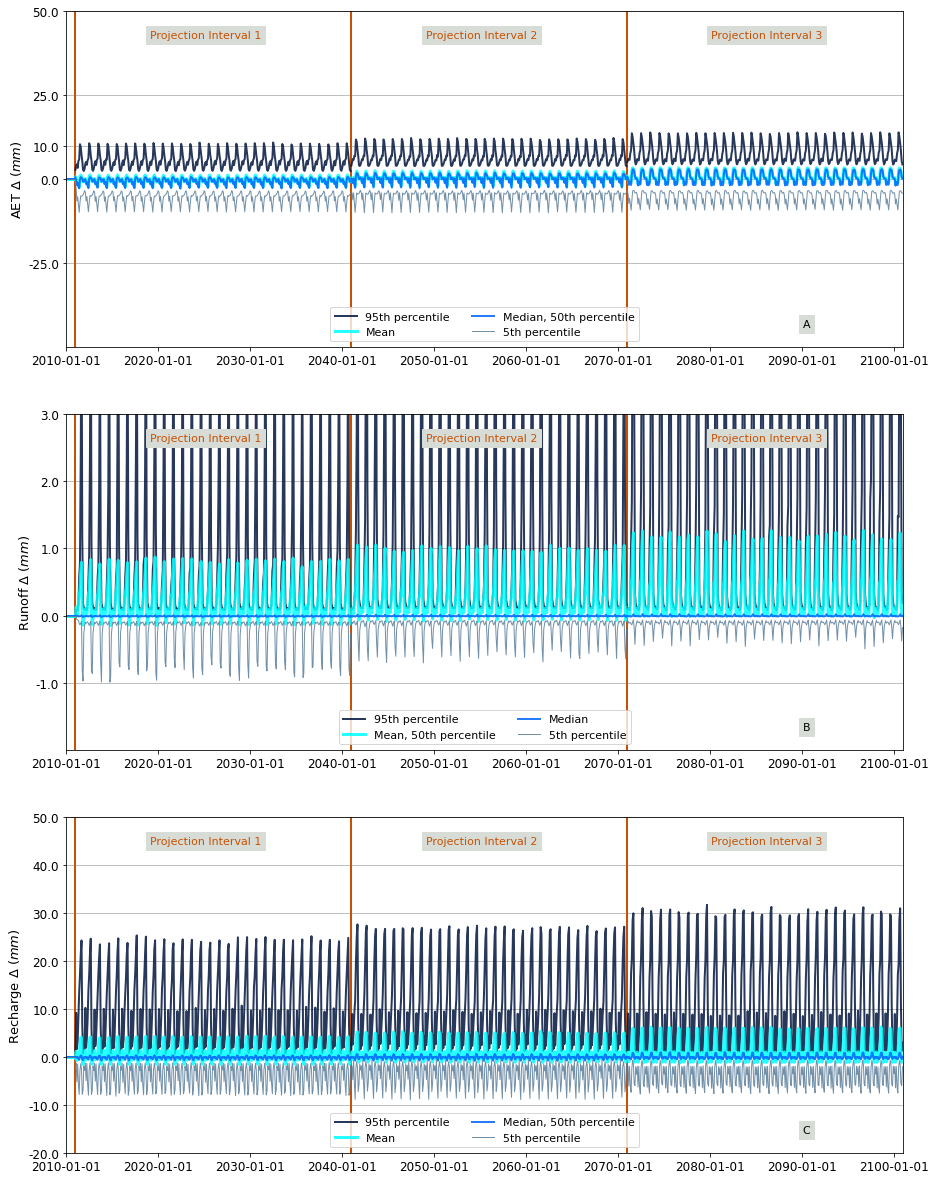

In [140]:
Fig1 = plt.figure()
Fig1.set_size_inches(15, 21)
ax31 = Fig1.add_subplot(3,1,1)
ax31.plot( [TP_DICT[2][0], TP_DICT[2][0]], [MinAET, MaxAET], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax31.plot( [TP_DICT[3][0], TP_DICT[3][0]], [MinAET, MaxAET], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax31.plot( [TP_DICT[4][0], TP_DICT[4][0]], [MinAET, MaxAET], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax31.plot( S1AETStats1.index, S1AETStats1[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy', label='95th percentile', alpha=alphVal)
ax31.plot( S1AETStats2.index, S1AETStats2[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy', alpha=alphVal )
ax31.plot( S1AETStats3.index, S1AETStats3[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy', alpha=alphVal )
ax31.plot( S1AETStats4.index, S1AETStats4[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy', alpha=alphVal )
ax31.plot( S1AETStats1.index, S1AETStats1[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan', label='Mean', alpha=alphVal )
ax31.plot( S1AETStats2.index, S1AETStats2[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan', alpha=alphVal )
ax31.plot( S1AETStats3.index, S1AETStats3[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan', alpha=alphVal )
ax31.plot( S1AETStats4.index, S1AETStats4[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan', alpha=alphVal )
ax31.plot( S1AETStats1.index, S1AETStats1[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue', label='Median, 50th percentile', alpha=alphVal)
ax31.plot( S1AETStats2.index, S1AETStats2[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue', alpha=alphVal )
ax31.plot( S1AETStats3.index, S1AETStats3[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue', alpha=alphVal )
ax31.plot( S1AETStats4.index, S1AETStats4[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue', alpha=alphVal )
ax31.plot( S1AETStats1.index, S1AETStats1[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:steel blue', label='5th percentile', alpha=alphVal )
ax31.plot( S1AETStats2.index, S1AETStats2[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:steel blue', alpha=alphVal )
ax31.plot( S1AETStats3.index, S1AETStats3[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:steel blue', alpha=alphVal )
ax31.plot( S1AETStats4.index, S1AETStats4[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:steel blue', alpha=alphVal )
ax31.set_xlim( (dt.datetime(2010, 1, 1), TP_DICT[4][1]))
ax31.set_yticks( aetTicks )
ax31.set_ylim( (MinAET, MaxAET) )
ax31.grid(True, axis='y', which='both')
ax31.set_ylabel('AET $\Delta$ ($mm$)', fontsize=13)
ax31.legend( loc='lower center', fontsize=11.0, ncol=2 )
ax31.tick_params(axis='both', which='major', labelsize=12)
ax31.tick_params(axis='x', which='major', labelrotation=0.0)
ax31.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax31.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y-%m-%d") )
ax31.annotate("A", xy=(0.88,0.06), xycoords="axes fraction", fontsize=11.0,
              backgroundcolor="xkcd:light grey")
ax31.annotate("Projection Interval 1", xy=(0.10, 0.92), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax31.annotate("Projection Interval 2", xy=(0.43, 0.92), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax31.annotate("Projection Interval 3", xy=(0.77, 0.92), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax41 = Fig1.add_subplot(3,1,2)
ax41.plot( [TP_DICT[2][0], TP_DICT[2][0]], [MinRO, MaxRO], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax41.plot( [TP_DICT[3][0], TP_DICT[3][0]], [MinRO, MaxRO], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax41.plot( [TP_DICT[4][0], TP_DICT[4][0]], [MinRO, MaxRO], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax41.plot( S1ROStats1.index, S1ROStats1[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy', label='95th percentile', alpha=alphVal)
ax41.plot( S1ROStats2.index, S1ROStats2[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy', alpha=alphVal )
ax41.plot( S1ROStats3.index, S1ROStats3[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy', alpha=alphVal )
ax41.plot( S1ROStats4.index, S1ROStats4[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy', alpha=alphVal )
ax41.plot( S1ROStats1.index, S1ROStats1[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan', label='Mean, 50th percentile', alpha=alphVal )
ax41.plot( S1ROStats2.index, S1ROStats2[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan', alpha=alphVal )
ax41.plot( S1ROStats3.index, S1ROStats3[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan', alpha=alphVal )
ax41.plot( S1ROStats4.index, S1ROStats4[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan', alpha=alphVal )
ax41.plot( S1ROStats1.index, S1ROStats1[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue', label='Median', alpha=alphVal)
ax41.plot( S1ROStats2.index, S1ROStats2[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue', alpha=alphVal )
ax41.plot( S1ROStats3.index, S1ROStats3[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue', alpha=alphVal )
ax41.plot( S1ROStats4.index, S1ROStats4[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue', alpha=alphVal )
ax41.plot( S1ROStats1.index, S1ROStats1[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:steel blue', label='5th percentile', alpha=alphVal )
ax41.plot( S1ROStats2.index, S1ROStats2[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:steel blue', alpha=alphVal )
ax41.plot( S1ROStats3.index, S1ROStats3[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:steel blue', alpha=alphVal )
ax41.plot( S1ROStats4.index, S1ROStats4[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:steel blue', alpha=alphVal )
ax41.set_xlim( (dt.datetime(2010, 1, 1), TP_DICT[4][1]))
ax41.set_yticks( roTicks )
ax41.set_ylim( (MinRO, MaxRO) )
ax41.grid(True, axis='y', which='both')
ax41.set_ylabel('Runoff $\Delta$ ($mm$)', fontsize=13)
ax41.legend( loc='lower center', fontsize=11.0, ncol=2 )
ax41.tick_params(axis='both', which='major', labelsize=12)
ax41.tick_params(axis='x', which='major', labelrotation=0.0)
ax41.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax41.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y-%m-%d") )
ax41.annotate("B", xy=(0.88,0.06), xycoords="axes fraction", fontsize=11.0,
              backgroundcolor="xkcd:light grey")
ax41.annotate("Projection Interval 1", xy=(0.10, 0.92), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax41.annotate("Projection Interval 2", xy=(0.43, 0.92), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax41.annotate("Projection Interval 3", xy=(0.77, 0.92), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax51 = Fig1.add_subplot(3,1,3)
ax51.plot( [TP_DICT[2][0], TP_DICT[2][0]], [MinRE, MaxRE], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax51.plot( [TP_DICT[3][0], TP_DICT[3][0]], [MinRE, MaxRE], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax51.plot( [TP_DICT[4][0], TP_DICT[4][0]], [MinRE, MaxRE], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax51.plot( S1REStats1.index, S1REStats1[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy', label='95th percentile', alpha=alphVal)
ax51.plot( S1REStats2.index, S1REStats2[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy', alpha=alphVal )
ax51.plot( S1REStats3.index, S1REStats3[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy', alpha=alphVal )
ax51.plot( S1REStats4.index, S1REStats4[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy', alpha=alphVal )
ax51.plot( S1REStats1.index, S1REStats1[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan', label='Mean', alpha=alphVal )
ax51.plot( S1REStats2.index, S1REStats2[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan', alpha=alphVal )
ax51.plot( S1REStats3.index, S1REStats3[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan', alpha=alphVal )
ax51.plot( S1REStats4.index, S1REStats4[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan', alpha=alphVal )
ax51.plot( S1REStats1.index, S1REStats1[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue', label='Median, 50th percentile', alpha=alphVal)
ax51.plot( S1REStats2.index, S1REStats2[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue', alpha=alphVal )
ax51.plot( S1REStats3.index, S1REStats3[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue', alpha=alphVal )
ax51.plot( S1REStats4.index, S1REStats4[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue', alpha=alphVal )
ax51.plot( S1REStats1.index, S1REStats1[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:steel blue', label='5th percentile', alpha=alphVal )
ax51.plot( S1REStats2.index, S1REStats2[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:steel blue', alpha=alphVal )
ax51.plot( S1REStats3.index, S1REStats3[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:steel blue', alpha=alphVal )
ax51.plot( S1REStats4.index, S1REStats4[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:steel blue', alpha=alphVal )
ax51.set_xlim( (dt.datetime(2010, 1, 1), TP_DICT[4][1]))
ax51.set_yticks( reTicks )
ax51.set_ylim( (MinRE, MaxRE) )
ax51.grid(True, axis='y', which='both')
ax51.set_ylabel('Recharge $\Delta$ ($mm$)', fontsize=13)
ax51.legend( loc='lower center', fontsize=11.0, ncol=2 )
ax51.tick_params(axis='both', which='major', labelsize=12)
ax51.tick_params(axis='x', which='major', labelrotation=0.0)
ax51.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax51.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y-%m-%d") )
ax51.annotate("C", xy=(0.88,0.06), xycoords="axes fraction", fontsize=11.0,
              backgroundcolor="xkcd:light grey")
ax51.annotate("Projection Interval 1", xy=(0.10, 0.92), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax51.annotate("Projection Interval 2", xy=(0.43, 0.92), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax51.annotate("Projection Interval 3", xy=(0.77, 0.92), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
Fig1.savefig( OutSVG )
Fig1.savefig( OutPNG )

In [141]:
OutSVG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "MWB_FS-3WB_%s.svg" % SIM_ROOT ) )
OutSVG

'C:\\Users\\nmart\\Documents\\CC_Plots\\Plots\\MWB_FS-3WB_DCmH_Del_.svg'

In [142]:
OutPNG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "MWB_FS-3WB_%s.png" % SIM_ROOT ) )
OutPNG

'C:\\Users\\nmart\\Documents\\CC_Plots\\Plots\\MWB_FS-3WB_DCmH_Del_.png'

In [143]:
fsTicks = [ -20.0, -10.0, 0.0, 10.0, 20.0 ]

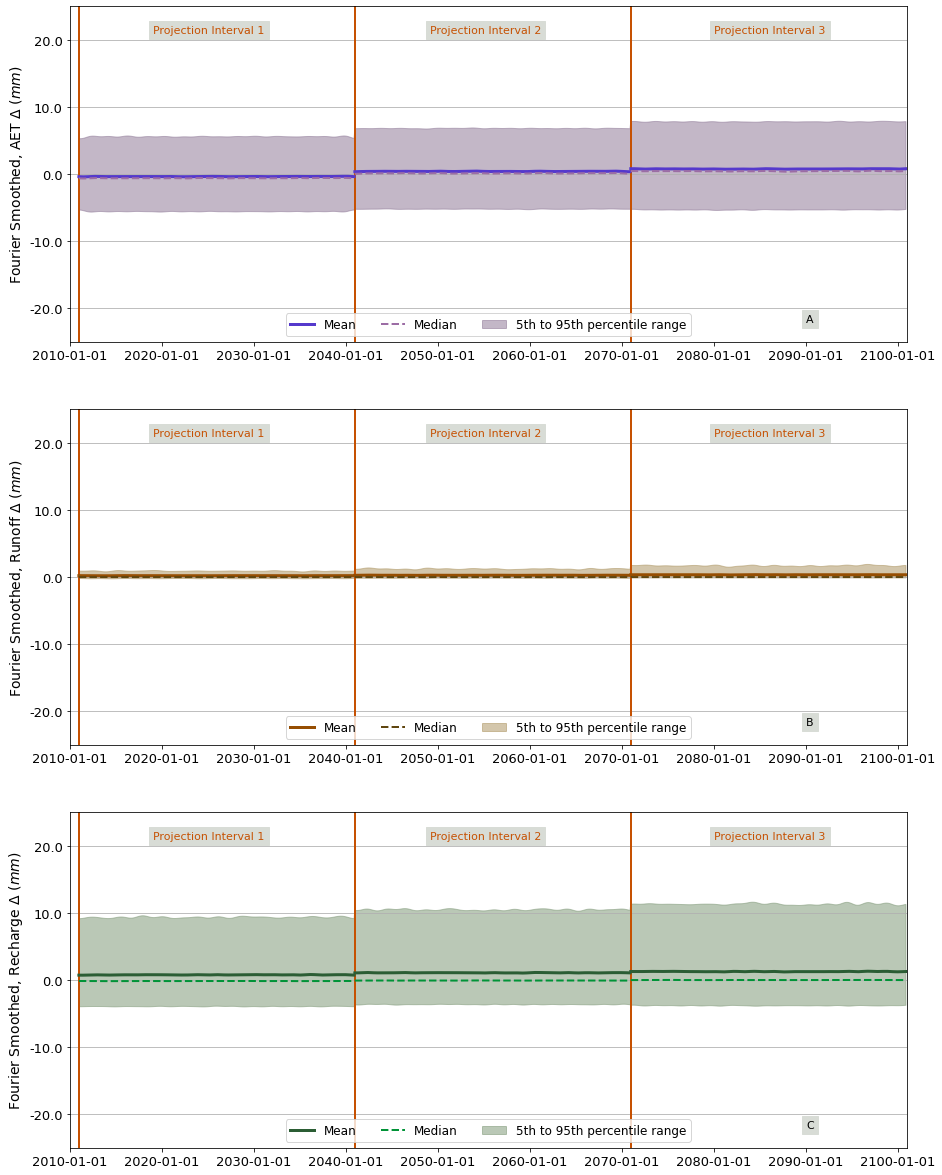

In [144]:
Fig1 = plt.figure()
Fig1.set_size_inches(15, 21)
ax31 = Fig1.add_subplot(3,1,1)
ax31.plot( [TP_DICT[2][0], TP_DICT[2][0]], [-25.0, 25.0], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax31.plot( [TP_DICT[3][0], TP_DICT[3][0]], [-25.0, 25.0], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax31.plot( [TP_DICT[4][0], TP_DICT[4][0]], [-25.0, 25.0], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
sfF = ax31.fill( DTTimeList, AETVals, color='xkcd:greyish purple', alpha=0.50, 
                 label="5th to 95th percentile range" )
ax31.plot( S1AETStats2.index, FF_AET2_me, linestyle='-',
           linewidth=3, color='xkcd:blurple', label='Mean' )
ax31.plot( S1AETStats3.index, FF_AET3_me, linestyle='-',
           linewidth=3, color='xkcd:blurple' )
ax31.plot( S1AETStats4.index, FF_AET4_me, linestyle='-',
           linewidth=3, color='xkcd:blurple' )
ax31.plot( S1AETStats2.index, FF_AET2_50, linestyle='dashed',
           linewidth=2, color='xkcd:dark lilac', label='Median' )
ax31.plot( S1AETStats3.index, FF_AET3_50, linestyle='dashed',
           linewidth=2, color='xkcd:dark lilac' )
ax31.plot( S1AETStats4.index, FF_AET4_50, linestyle='dashed',
           linewidth=2, color='xkcd:dark lilac' )
ax31.set_xlim( (dt.datetime(2010, 1, 1), TP_DICT[4][1]))
ax31.set_yticks( fsTicks )
ax31.set_ylim( (-25.0, 25.0) )
ax31.grid(True, axis='y', which='both')
ax31.set_ylabel('Fourier Smoothed, AET $\Delta$ ($mm$)', fontsize=14)
ax31.legend( loc='lower center', fontsize=12.0, ncol=3 )
ax31.tick_params(axis='both', which='major', labelsize=13)
ax31.tick_params(axis='x', which='major', labelrotation=0.0)
ax31.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax31.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y-%m-%d") )
ax31.annotate("A", xy=(0.88,0.06), xycoords="axes fraction", fontsize=11.0,
              backgroundcolor="xkcd:light grey")
ax31.annotate("Projection Interval 1", xy=(0.10, 0.92), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax31.annotate("Projection Interval 2", xy=(0.43, 0.92), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax31.annotate("Projection Interval 3", xy=(0.77, 0.92), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax41 = Fig1.add_subplot(3,1,2)
ax41.plot( [TP_DICT[2][0], TP_DICT[2][0]], [-25.0, 25.0], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax41.plot( [TP_DICT[3][0], TP_DICT[3][0]], [-25.0, 25.0], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax41.plot( [TP_DICT[4][0], TP_DICT[4][0]], [-25.0, 25.0], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
sfF = ax41.fill( DTTimeList, ROVals, color='xkcd:dark sand', alpha=0.50, 
                 label="5th to 95th percentile range")
ax41.plot( S1ROStats2.index, FF_RO2_me, linestyle='-',
           linewidth=3, color='xkcd:warm brown', label='Mean' )
ax41.plot( S1ROStats3.index, FF_RO3_me, linestyle='-',
           linewidth=3, color='xkcd:warm brown' )
ax41.plot( S1ROStats4.index, FF_RO4_me, linestyle='-',
           linewidth=3, color='xkcd:warm brown' )
ax41.plot( S1ROStats2.index, FF_RO2_50, linestyle='dashed',
           linewidth=2, color='xkcd:mud brown', label='Median' )
ax41.plot( S1ROStats3.index, FF_RO3_50, linestyle='dashed',
           linewidth=2, color='xkcd:mud brown' )
ax41.plot( S1ROStats4.index, FF_RO4_50, linestyle='dashed',
           linewidth=2, color='xkcd:mud brown' )
ax41.set_xlim( (dt.datetime(2010, 1, 1), TP_DICT[4][1]))
ax41.set_yticks( fsTicks )
ax41.set_ylim( (-25.0, 25.0) )
ax41.grid(True, axis='y', which='both')
ax41.set_ylabel('Fourier Smoothed, Runoff $\Delta$ ($mm$)', fontsize=14)
ax41.legend( loc='lower center', fontsize=12.0, ncol=3 )
ax41.tick_params(axis='both', which='major', labelsize=13)
ax41.tick_params(axis='x', which='major', labelrotation=0.0)
ax41.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax41.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y-%m-%d") )
ax41.annotate("B", xy=(0.88,0.06), xycoords="axes fraction", fontsize=11.0,
              backgroundcolor="xkcd:light grey")
ax41.annotate("Projection Interval 1", xy=(0.10, 0.92), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax41.annotate("Projection Interval 2", xy=(0.43, 0.92), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax41.annotate("Projection Interval 3", xy=(0.77, 0.92), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax51 = Fig1.add_subplot(3,1,3)
ax51.plot( [TP_DICT[2][0], TP_DICT[2][0]], [-25.0, 25.0], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax51.plot( [TP_DICT[3][0], TP_DICT[3][0]], [-25.0, 25.0], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax51.plot( [TP_DICT[4][0], TP_DICT[4][0]], [-25.0, 25.0], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
sfF = ax51.fill( DTTimeList, REVals, color='xkcd:green grey', alpha=0.50, 
                 label="5th to 95th percentile range")
ax51.plot( S1REStats2.index, FF_RE2_me, linestyle='-',
           linewidth=3, color='xkcd:pine', label='Mean' )
ax51.plot( S1REStats3.index, FF_RE3_me, linestyle='-',
           linewidth=3, color='xkcd:pine' )
ax51.plot( S1REStats4.index, FF_RE4_me, linestyle='-',
           linewidth=3, color='xkcd:pine' )
ax51.plot( S1REStats2.index, FF_RE2_50, linestyle='dashed',
           linewidth=2, color='xkcd:kelley green', label='Median' )
ax51.plot( S1REStats3.index, FF_RE3_50, linestyle='dashed',
           linewidth=2, color='xkcd:kelley green' )
ax51.plot( S1REStats4.index, FF_RE4_50, linestyle='dashed',
           linewidth=2, color='xkcd:kelley green' )
ax51.set_xlim( (dt.datetime(2010, 1, 1), TP_DICT[4][1]))
ax51.set_yticks( fsTicks )
ax51.set_ylim( (-25.0, 25.0) )
ax51.grid(True, axis='y', which='both')
ax51.set_ylabel('Fourier Smoothed, Recharge $\Delta$ ($mm$)', fontsize=14)
ax51.legend( loc='lower center', fontsize=12.0, ncol=3 )
ax51.tick_params(axis='both', which='major', labelsize=13)
ax51.tick_params(axis='x', which='major', labelrotation=0.0)
ax51.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax51.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y-%m-%d") )
ax51.annotate("C", xy=(0.88,0.06), xycoords="axes fraction", fontsize=11.0,
              backgroundcolor="xkcd:light grey")
ax51.annotate("Projection Interval 1", xy=(0.10, 0.92), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax51.annotate("Projection Interval 2", xy=(0.43, 0.92), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax51.annotate("Projection Interval 3", xy=(0.77, 0.92), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
Fig1.savefig( OutSVG )
Fig1.savefig( OutPNG )

### Recharge for Framework

In [145]:
OutSVG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "FF_REDelta_mHSP2_FSm.svg" ) )
OutSVG

'C:\\Users\\nmart\\Documents\\CC_Plots\\Plots\\FF_REDelta_mHSP2_FSm.svg'

In [146]:
OutPNG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "FF_REDelta_mHSP2_FSm.png" ) )
OutPNG

'C:\\Users\\nmart\\Documents\\CC_Plots\\Plots\\FF_REDelta_mHSP2_FSm.png'

In [147]:
MaxRE = 200.0
MinRE = -125.0

In [148]:
RETicks = [ -100.0, -50.0, 0.0, 50.0, 100.0, 150.0 ]

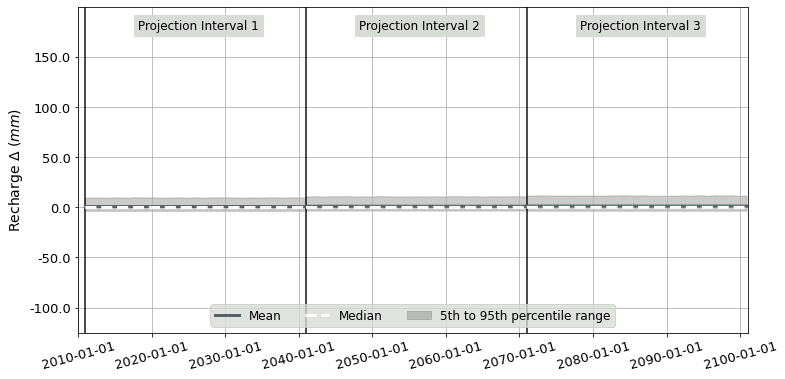

In [149]:
Fig1 = plt.figure()
Fig1.set_size_inches(12.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( [TP_DICT[2][0], TP_DICT[2][0]], [MinRE, MaxRE], linestyle='-',
           linewidth=2, color='xkcd:black', alpha=0.7)
ax11.plot( [TP_DICT[3][0], TP_DICT[3][0]], [MinRE, MaxRE], linestyle='-',
           linewidth=2, color='xkcd:black', alpha=0.7 )
ax11.plot( [TP_DICT[4][0], TP_DICT[4][0]], [MinRE, MaxRE], linestyle='-',
           linewidth=2, color='xkcd:black', alpha=0.7 )
sfF = ax11.fill( DTTimeList, REVals, color='xkcd:medium grey', alpha=0.40, 
                 label="5th to 95th percentile range")
ax11.plot( S1REStats2.index, FF_RE2_me, linestyle='-',
           linewidth=3, color='xkcd:gunmetal', label='Mean' )
ax11.plot( S1REStats3.index, FF_RE3_me, linestyle='-',
           linewidth=3, color='xkcd:gunmetal' )
ax11.plot( S1REStats4.index, FF_RE4_me, linestyle='-',
           linewidth=3, color='xkcd:gunmetal' )
ax11.plot( S1REStats2.index, FF_RE2_50, linestyle='dashed',
           linewidth=3, color='xkcd:pale grey', label='Median' )
ax11.plot( S1REStats3.index, FF_RE3_50, linestyle='dashed',
           linewidth=3, color='xkcd:pale grey' )
ax11.plot( S1REStats4.index, FF_RE4_50, linestyle='dashed',
           linewidth=3, color='xkcd:pale grey' )
ax11.set_xlim( (dt.datetime(2010, 1, 1), TP_DICT[4][1]))
ax11.set_yticks( RETicks )
ax11.set_ylim( (MinRE, MaxRE) )
ax11.grid(True, axis='y', which='both')
ax11.set_ylabel('Recharge $\Delta$ ($mm$)', fontsize=14)
ax11.grid( b=True )
ax11.legend( loc='lower center', ncol=3, fontsize=12.0, facecolor="xkcd:light grey")
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.tick_params(axis='x', which='major', labelrotation=15.0)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y-%m-%d") )
ax11.annotate("Projection Interval 1", xy=(0.09, 0.93), xycoords="axes fraction",
              fontsize=12.0, color="xkcd:black", backgroundcolor="xkcd:light grey" )
ax11.annotate("Projection Interval 2", xy=(0.42, 0.93), xycoords="axes fraction",
              fontsize=12.0, color="xkcd:black", backgroundcolor="xkcd:light grey" )
ax11.annotate("Projection Interval 3", xy=(0.75, 0.93), xycoords="axes fraction",
              fontsize=12.0, color="xkcd:black", backgroundcolor="xkcd:light grey" )
Fig1.savefig( OutSVG )
Fig1.savefig( OutPNG )

### 2 Weather Plots Together

In [150]:
OutSVG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "Results_MWB-2Weather_%s.svg" % SIM_ROOT ) )
OutSVG

'C:\\Users\\nmart\\Documents\\CC_Plots\\Plots\\Results_MWB-2Weather_DCmH_Del_.svg'

In [151]:
OutPNG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "Results_MWB-2Weather_%s.png" % SIM_ROOT ) )
OutPNG

'C:\\Users\\nmart\\Documents\\CC_Plots\\Plots\\Results_MWB-2Weather_DCmH_Del_.png'

In [152]:
alphVal = 0.85

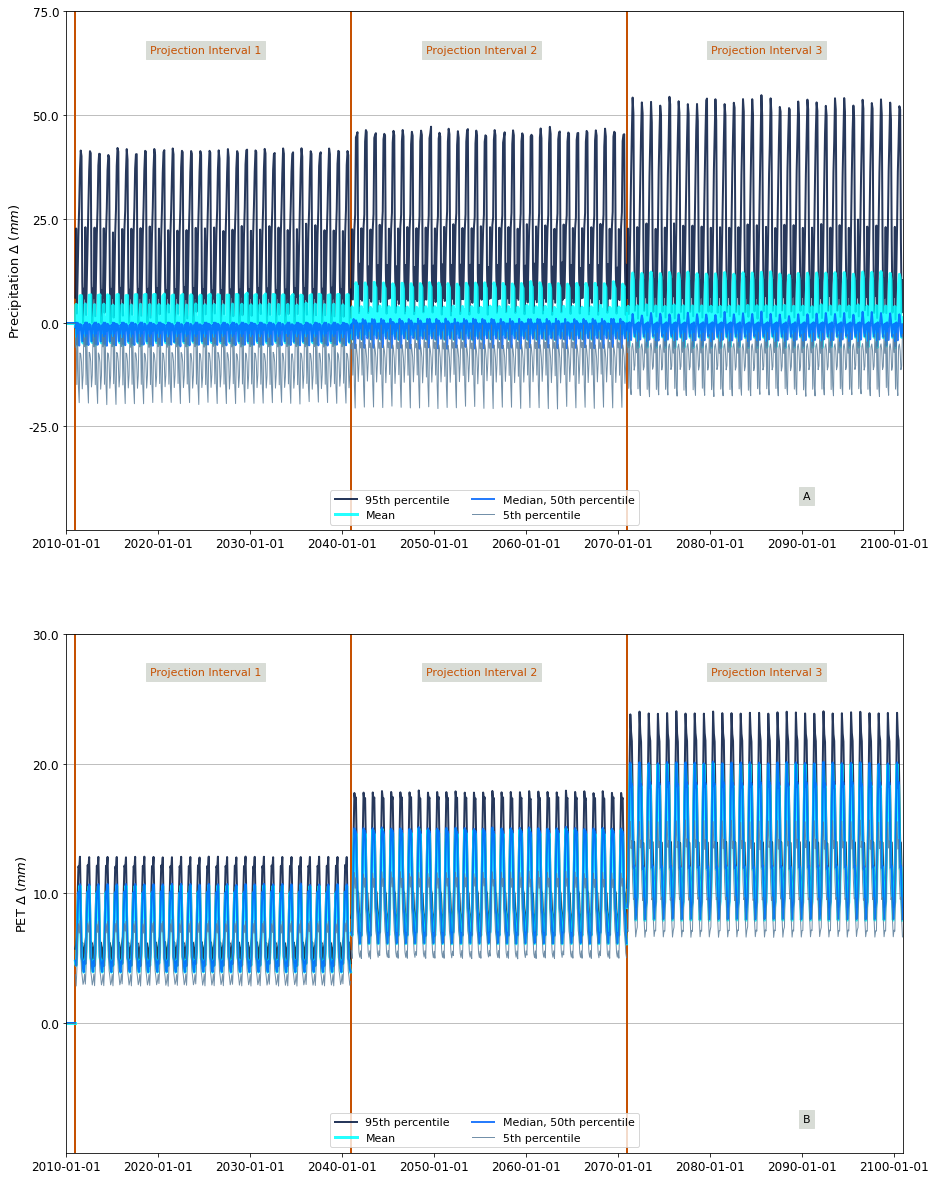

In [153]:
Fig1 = plt.figure()
Fig1.set_size_inches(15, 21)
ax11 = Fig1.add_subplot(2,1,1)
ax11.plot( [TP_DICT[2][0], TP_DICT[2][0]], [MinPrecip, MaxPrecip], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax11.plot( [TP_DICT[3][0], TP_DICT[3][0]], [MinPrecip, MaxPrecip], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax11.plot( [TP_DICT[4][0], TP_DICT[4][0]], [MinPrecip, MaxPrecip], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax11.plot( S1PreStats1.index, S1PreStats1[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy', label='95th percentile', alpha=alphVal )
ax11.plot( S1PreStats2.index, S1PreStats2[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy', alpha=alphVal )
ax11.plot( S1PreStats3.index, S1PreStats3[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy', alpha=alphVal )
ax11.plot( S1PreStats4.index, S1PreStats4[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy', alpha=alphVal )
ax11.plot( S1PreStats1.index, S1PreStats1[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan', label='Mean', alpha=alphVal )
ax11.plot( S1PreStats2.index, S1PreStats2[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan', alpha=alphVal )
ax11.plot( S1PreStats3.index, S1PreStats3[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan', alpha=alphVal )
ax11.plot( S1PreStats4.index, S1PreStats4[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan', alpha=alphVal )
ax11.plot( S1PreStats1.index, S1PreStats1[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue', label='Median, 50th percentile', alpha=alphVal)
ax11.plot( S1PreStats2.index, S1PreStats2[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue', alpha=alphVal )
ax11.plot( S1PreStats3.index, S1PreStats3[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue', alpha=alphVal )
ax11.plot( S1PreStats4.index, S1PreStats4[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue', alpha=alphVal )
ax11.plot( S1PreStats1.index, S1PreStats1[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:steel blue', label='5th percentile', alpha=alphVal )
ax11.plot( S1PreStats2.index, S1PreStats2[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:steel blue', alpha=alphVal )
ax11.plot( S1PreStats3.index, S1PreStats3[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:steel blue', alpha=alphVal )
ax11.plot( S1PreStats4.index, S1PreStats4[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:steel blue', alpha=alphVal )
ax11.set_xlim( (dt.datetime(2010, 1, 1), TP_DICT[4][1]))
ax11.set_yticks( preTicks )
ax11.set_ylim( (MinPrecip, MaxPrecip) )
ax11.grid(True, axis='y', which='both')
ax11.set_ylabel('Precipitation $\Delta$ ($mm$)', fontsize=13)
ax11.legend( loc='lower center', fontsize=11.0, ncol=2)
ax11.tick_params(axis='both', which='major', labelsize=12)
ax11.tick_params(axis='x', which='major', labelrotation=0.0)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y-%m-%d") )
ax11.annotate("A", xy=(0.88,0.06), xycoords="axes fraction", fontsize=11.0,
              backgroundcolor="xkcd:light grey")
ax11.annotate("Projection Interval 1", xy=(0.10, 0.92), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax11.annotate("Projection Interval 2", xy=(0.43, 0.92), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax11.annotate("Projection Interval 3", xy=(0.77, 0.92), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax21 = Fig1.add_subplot(2,1,2)
ax21.plot( [TP_DICT[2][0], TP_DICT[2][0]], [MinPET, MaxPET], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax21.plot( [TP_DICT[3][0], TP_DICT[3][0]], [MinPET, MaxPET], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax21.plot( [TP_DICT[4][0], TP_DICT[4][0]], [MinPET, MaxPET], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax21.plot( S1PETStats1.index, S1PETStats1[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy', label='95th percentile', alpha=alphVal )
ax21.plot( S1PETStats2.index, S1PETStats2[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy', alpha=alphVal )
ax21.plot( S1PETStats3.index, S1PETStats3[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy', alpha=alphVal )
ax21.plot( S1PETStats4.index, S1PETStats4[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy', alpha=alphVal )
ax21.plot( S1PETStats1.index, S1PETStats1[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan', label='Mean', alpha=alphVal )
ax21.plot( S1PETStats2.index, S1PETStats2[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan', alpha=alphVal )
ax21.plot( S1PETStats3.index, S1PETStats3[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan', alpha=alphVal )
ax21.plot( S1PETStats4.index, S1PETStats4[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan', alpha=alphVal )
ax21.plot( S1PETStats1.index, S1PETStats1[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue', label='Median, 50th percentile', alpha=alphVal)
ax21.plot( S1PETStats2.index, S1PETStats2[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue', alpha=alphVal )
ax21.plot( S1PETStats3.index, S1PETStats3[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue', alpha=alphVal )
ax21.plot( S1PETStats4.index, S1PETStats4[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue', alpha=alphVal )
ax21.plot( S1PETStats1.index, S1PETStats1[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:steel blue', label='5th percentile', alpha=alphVal )
ax21.plot( S1PETStats2.index, S1PETStats2[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:steel blue', alpha=alphVal )
ax21.plot( S1PETStats3.index, S1PETStats3[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:steel blue', alpha=alphVal )
ax21.plot( S1PETStats4.index, S1PETStats4[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:steel blue', alpha=alphVal )
ax21.set_xlim( (dt.datetime(2010, 1, 1), TP_DICT[4][1]))
ax21.set_yticks( petTicks )
ax21.set_ylim( (MinPET, MaxPET) )
ax21.grid(True, axis='y', which='both')
ax21.set_ylabel('PET $\Delta$ ($mm$)', fontsize=13)
ax21.legend( loc='lower center', fontsize=11.0, ncol=2)
ax21.tick_params(axis='both', which='major', labelsize=12)
ax21.tick_params(axis='x', which='major', labelrotation=0.0)
ax21.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax21.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y-%m-%d") )
ax21.annotate("B", xy=(0.88,0.06), xycoords="axes fraction", fontsize=11.0,
              backgroundcolor="xkcd:light grey")
ax21.annotate("Projection Interval 1", xy=(0.10, 0.92), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax21.annotate("Projection Interval 2", xy=(0.43, 0.92), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax21.annotate("Projection Interval 3", xy=(0.77, 0.92), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
Fig1.savefig( OutSVG )
Fig1.savefig( OutPNG )

In [154]:
OutSVG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "MWB_FS-2Weather_%s.svg" % SIM_ROOT ) )
OutSVG

'C:\\Users\\nmart\\Documents\\CC_Plots\\Plots\\MWB_FS-2Weather_DCmH_Del_.svg'

In [155]:
OutPNG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "MWB_FS-2Weather_%s.png" % SIM_ROOT ) )
OutPNG

'C:\\Users\\nmart\\Documents\\CC_Plots\\Plots\\MWB_FS-2Weather_DCmH_Del_.png'

In [156]:
wfsTicks = [ -10.0, 0.0, 10.0, 20.0, 30.0 ]

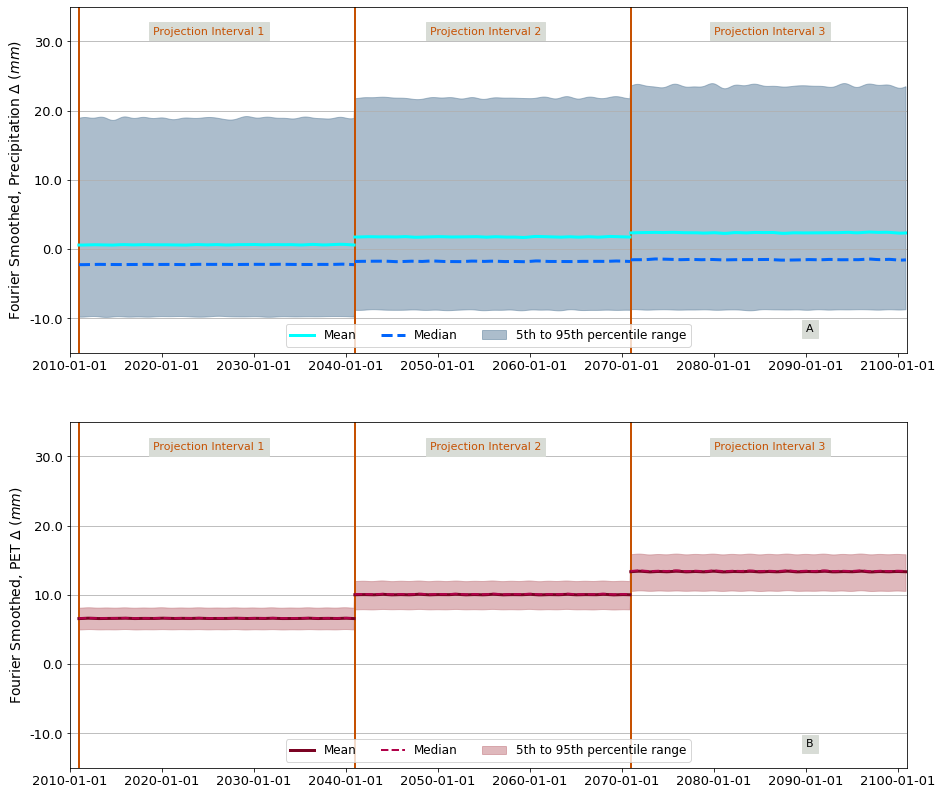

In [157]:
Fig1 = plt.figure()
Fig1.set_size_inches(15.0, 14.0)
ax11 = Fig1.add_subplot(2,1,1)
ax11.plot( [TP_DICT[2][0], TP_DICT[2][0]], [-15.0, 35.0], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax11.plot( [TP_DICT[3][0], TP_DICT[3][0]], [-15.0, 35.0], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax11.plot( [TP_DICT[4][0], TP_DICT[4][0]], [-15.0, 35.0], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
sfF = ax11.fill( DTTimeList, PreVals, color='xkcd:steel blue', alpha=0.50, 
                 label="5th to 95th percentile range")
ax11.plot( S1PreStats2.index, FF_Pre2_me, linestyle='-',
           linewidth=3, color='xkcd:cyan', label='Mean' )
ax11.plot( S1PreStats3.index, FF_Pre3_me, linestyle='-',
           linewidth=3, color='xkcd:cyan' )
ax11.plot( S1PreStats4.index, FF_Pre4_me, linestyle='-',
           linewidth=3, color='xkcd:cyan' )
ax11.plot( S1PreStats2.index, FF_Pre2_50, linestyle='dashed',
           linewidth=3, color='xkcd:bright blue', label='Median' )
ax11.plot( S1PreStats3.index, FF_Pre3_50, linestyle='dashed',
           linewidth=3, color='xkcd:bright blue' )
ax11.plot( S1PreStats4.index, FF_Pre4_50, linestyle='dashed',
           linewidth=3, color='xkcd:bright blue' )
ax11.set_xlim( (dt.datetime(2010, 1, 1), TP_DICT[4][1]))
ax11.set_yticks( wfsTicks )
ax11.set_ylim( (-15.0, 35.0) )
ax11.grid(True, axis='y', which='both')
ax11.set_ylabel('Fourier Smoothed, Precipitation $\Delta$ ($mm$)', fontsize=14)
ax11.legend( loc='lower center', fontsize=12.0, ncol=3)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.tick_params(axis='x', which='major', labelrotation=0.0)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y-%m-%d") )
ax11.annotate("A", xy=(0.88,0.06), xycoords="axes fraction", fontsize=11.0,
              backgroundcolor="xkcd:light grey")
ax11.annotate("Projection Interval 1", xy=(0.10, 0.92), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax11.annotate("Projection Interval 2", xy=(0.43, 0.92), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax11.annotate("Projection Interval 3", xy=(0.77, 0.92), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax21 = Fig1.add_subplot(2,1,2)
ax21.plot( [TP_DICT[2][0], TP_DICT[2][0]], [-15.0, 35.0], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax21.plot( [TP_DICT[3][0], TP_DICT[3][0]], [-15.0, 35.0], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax21.plot( [TP_DICT[4][0], TP_DICT[4][0]], [-15.0, 35.0], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
sfF = ax21.fill( DTTimeList, PETVals, color='xkcd:dusty rose', alpha=0.50, 
                 label="5th to 95th percentile range")
ax21.plot( S1PETStats2.index, FF_PET2_me, linestyle='-',
           linewidth=3, label='Mean', color='xkcd:wine red' )
ax21.plot( S1PETStats3.index, FF_PET3_me, linestyle='-',
           linewidth=3, color='xkcd:wine red' )
ax21.plot( S1PETStats4.index, FF_PET4_me, linestyle='-',
           linewidth=3, color='xkcd:wine red' )
ax21.plot( S1PETStats2.index, FF_PET2_50, linestyle='dashed',
           linewidth=2, label='Median', color='xkcd:raspberry' )
ax21.plot( S1PETStats3.index, FF_PET3_50, linestyle='dashed',
           linewidth=2, color='xkcd:raspberry' )
ax21.plot( S1PETStats4.index, FF_PET4_50, linestyle='dashed',
           linewidth=2, color='xkcd:raspberry' )
ax21.set_xlim( (dt.datetime(2010, 1, 1), TP_DICT[4][1]))
ax21.set_yticks( wfsTicks )
ax21.set_ylim( (-15.0, 35.0) )
ax21.grid(True, axis='y', which='both')
ax21.set_ylabel('Fourier Smoothed, PET $\Delta$ ($mm$)', fontsize=14)
ax21.legend( loc='lower center', fontsize=12.0, ncol=3)
ax21.tick_params(axis='both', which='major', labelsize=13)
ax21.tick_params(axis='x', which='major', labelrotation=0.0)
ax21.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax21.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y-%m-%d") )
ax21.annotate("B", xy=(0.88,0.06), xycoords="axes fraction", fontsize=11.0,
              backgroundcolor="xkcd:light grey")
ax21.annotate("Projection Interval 1", xy=(0.10, 0.92), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax21.annotate("Projection Interval 2", xy=(0.43, 0.92), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax21.annotate("Projection Interval 3", xy=(0.77, 0.92), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
Fig1.savefig( OutSVG )
Fig1.savefig( OutPNG )